# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dataset

Google drive has been mounted in this block to make accessing the data easy.

In [ ]:
path = "/content/drive/My Drive/Projects/NPRI_2000-2022.csv"
df = pd.read_csv(path)

<ipython-input-4-b9865c7e242c>:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


## 1. Introduction to the Dataset

Objective: The National Pollutant Release Inventory (NPRI) dataset from Environment and Climate Change Canada (ECCC) serves as a national data collection on pollutant releases, disposals, and transfers from facilities across Canada. Spanning from 2000 to 2022, this dataset provides detailed information on pollutants emitted by various industries, their impact, and their geographical distribution. Our primary analysis objectives are as follows:

Identify which industry reported the most spills between 2000 and 2022.
Predict the number of spills expected in 2023 and estimate the total amount that may be spilled.
Data Overview: The dataset includes key features that will be central to our analysis:

*Reporting_Year: Indicates the year of the reported data, spanning from 2000 to
2022.

*NAICS Code/Title: Represents the industry classification for each reporting facility, using the North American Industry Classification System (NAICS).

*Spill Count: The number of spills reported by each industry per year.

*Total Spilled Amount: Total volume or mass of pollutants spilled, providing insight into the severity and scale of each industry's impact.

# Understanding the data
In order to understand the data, we need to perform some analytical methods, as below:

1. Number of rows and Columns using `shape()`
2. Head of the dataset using `head()`
3. Statistics of the data using `describe()`
4. Number of Null values and Data type using `info()`
5. Then at end we tried to provide description of each column.
6. We checked for the year of reporting using `value_counts()`. It shows that we have data from 2000 to 2022.

In [ ]:
df.shape

(737516, 28)

In [ ]:
df.head()

Reporting_Year / Année  NPRI_ID / No_INRP Number of employees  \
0                    2000                  1                 440   
1                    2000                  1                 440   
2                    2000                  1                 440   
3                    2000                  1                 440   
4                    2000                  1                 440   

  Company_Name / Dénomination_sociale_de_l'entreprise  \
0             Alberta-Pacific Forest Industries Inc.    
1             Alberta-Pacific Forest Industries Inc.    
2             Alberta-Pacific Forest Industries Inc.    
3             Alberta-Pacific Forest Industries Inc.    
4             Alberta-Pacific Forest Industries Inc.    

  Facility_Name / Installation  NAICS / Code_SCIAN  \
0                      (blank)              322112   
1                      (blank)              322112   
2                      (blank)              322112   
3                      (blank)              322112   
4                      (blank)              322112   

  NAICS Title / Titre Code_SCIAN PROVINCE                 City   Latitude  \
0            Chemical pulp mills       AB  County of Athabasca  54.923116   
1            Chemical pulp mills       AB  County of Athabasca  54.923116   
2            Chemical pulp mills       AB  County of Athabasca  54.923116   
3            Chemical pulp mills       AB  County of Athabasca  54.923116   
4            Chemical pulp mills       AB  County of Athabasca  54.923116   

   ...  Release to Air - Spills  Release to Air - Stack / Point    \
0  ...                       NaN                            5.200   
1  ...                       NaN                          113.000   
2  ...                       NaN                              NaN   
3  ...                       NaN                            7.670   
4  ...                       NaN                            0.665   

  Release to Air - Storage / Handling  Releases to Land - Leaks  \
0                                  NaN                      NaN   
1                                  NaN                      NaN   
2                                  NaN                      NaN   
3                                  NaN                      NaN   
4                                  NaN                      NaN   

  Releases to Land - Other   Releases to Land - Spills   \
0                       NaN                         NaN   
1                       NaN                         NaN   
2                       NaN                         NaN   
3                       NaN                         NaN   
4                       NaN                         NaN   

   Releases to Water Bodies - Direct Discharges   \
0                                            NaN   
1                                            NaN   
2                                            0.0   
3                                            NaN   
4                                            NaN   

   Releases to Water Bodies - Leaks  Releases to Water Bodies - Spills   \
0                               NaN                                 NaN   
1                               NaN                                 NaN   
2                               NaN                                 NaN   
3                               NaN                                 NaN   
4                               NaN                                 NaN   

   Sum of release to all media (<1tonne)  
0                                    NaN  
1                                    NaN  
2                                    NaN  
3                                    NaN  
4                                    NaN  

[5 rows x 28 columns]

In [ ]:
df.describe()

Reporting_Year / Année  NPRI_ID / No_INRP  NAICS / Code_SCIAN  \
count           737516.000000      737516.000000       737516.000000   
mean              2012.267601       11248.268386       289175.551820   
std                  6.400156        9352.868266        94788.542197   
min               2000.000000           1.000000       111120.000000   
25%               2007.000000        3775.000000       211113.000000   
50%               2012.000000        7114.000000       312140.000000   
75%               2018.000000       18093.000000       327120.000000   
max               2022.000000      306556.000000       913910.000000   

            Latitude      Longitude  Release to Air - Fugitive  \
count  733434.000000  733434.000000              125032.000000   
mean       49.644636     -97.375436                  61.156824   
std         5.155658      20.184399                 797.572502   
min         0.000000    -140.883600                   0.000000   
25%        45.431000    -114.767700                   0.051000   
50%        49.795100    -104.630100                   0.796000   
75%        53.508500     -79.540060                   7.582000   
max        82.498758       0.000000               58433.900000   

       Release to Air - Other Non-Point   Release to Air - Road dust    \
count                       30880.000000                  29861.000000   
mean                           91.455034                    117.236013   
std                          1628.905004                    856.012131   
min                             0.000000                      0.000000   
25%                             0.013000                      0.505400   
50%                             0.490000                      3.561900   
75%                             7.458500                     22.000000   
max                         91138.200000                  39992.961050   

       Release to Air - Spills   Release to Air - Stack / Point    \
count               9181.000000                     513282.000000   
mean                   1.742604                        144.203321   
std                   22.223163                       2014.861249   
min                    0.000000                          0.000000   
25%                    0.000000                          0.429000   
50%                    0.000300                          4.037595   
75%                    0.040000                         37.389000   
max                 1554.400000                     235907.000000   

       Release to Air - Storage / Handling   Releases to Land - Leaks  \
count                          80004.000000                910.000000   
mean                              23.462437                  0.356315   
std                              218.305058                  2.586239   
min                                0.000000                  0.000000   
25%                                0.015000                  0.000000   
50%                                0.358000                  0.000000   
75%                                3.953000                  0.000000   
max                            17883.110000                 39.058000   

       Releases to Land - Other   Releases to Land - Spills   \
count                5668.000000                 4470.000000   
mean                  515.614162                    5.090716   
std                  3181.280880                   93.378082   
min                     0.000000                    0.000000   
25%                     0.001000                    0.000000   
50%                     5.000000                    0.002000   
75%                    47.000000                    0.030000   
max                152270.000000                 4500.100000   

       Releases to Water Bodies - Direct Discharges   \
count                                   53188.000000   
mean                                       79.052084   
std                                       577.693253   
min            

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737516 entries, 0 to 737515
Data columns (total 28 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   Reporting_Year / Année                                 737516 non-null  int64  
 1   NPRI_ID / No_INRP                                      737516 non-null  int64  
 2   Number of employees                                    736900 non-null  object 
 3   Company_Name / Dénomination_sociale_de_l'entreprise    737516 non-null  object 
 4   Facility_Name / Installation                           736340 non-null  object 
 5   NAICS / Code_SCIAN                                     737516 non-null  int64  
 6   NAICS Title / Titre Code_SCIAN                         737516 non-null  object 
 7   PROVINCE                                               737516 non-null  object 
 8   City                              

In [ ]:
df_year_counts = df['Reporting_Year / Année'].value_counts().sort_index()
print(df_year_counts)

Reporting_Year / Année
2000     9285
2001    10751
2002    23867
2003    32605
2004    33508
2005    33324
2006    34413
2007    34302
2008    34023
2009    32495
2010    31292
2011    30845
2012    30062
2013    30646
2014    30801
2015    30197
2016    30123
2017    30315
2018    44553
2019    44180
2020    42047
2021    41198
2022    42684
Name: count, dtype: int64


### Description of columns

| Column Name                                                                 | Description                                                                                                 |
|-----------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------|
| **Reporting_Year / Année**                                                 | Year the data was reported.                                                                                 |
| **NPRI_ID / No_INRP**                                                      | Unique identifier for each NPRI entry.                                                                     |
| **Number of employees**                                                    | Total number of employees at the facility (some entries missing).                                           |
| **Company_Name / Dénomination_sociale_de_l'entreprise**                    | Name of the company operating the facility.                                                                  |
| **Facility_Name / Installation**                                           | Name of the facility where pollutants are released (some entries missing).                                   |
| **NAICS / Code_SCIAN**                                                    | NAICS code categorizing the facility's primary business activity.                                           |
| **NAICS Title / Titre Code_SCIAN**                                        | Descriptive title associated with the NAICS code.                                                           |
| **PROVINCE**                                                                | Province or territory where the facility is located.                                                        |
| **City**                                                                    | City where the facility is situated (many missing values).                                                  |
| **Latitude**                                                                | Geographic latitude of the facility (some entries missing).                                                 |
| **Longitude**                                                               | Geographic longitude of the facility (some entries missing).                                                |
| **CAS_Number / No_CAS**                                                    | CAS number associated with specific substances released.                                                    |
| **Substance Name (English) / Nom de substance (Anglais)**                  | Name of the substance being reported in English.                                                            |
| **Units / Unités**                                                         | Units of measurement for pollutant release quantities.                                                       |
| **Estimation_Method / Méthode_d’estimation**                               | Method used to estimate release quantities.                                                                  |
| **Release to Air - Fugitive**                                             | Amount of pollutants released to the air through unintentional emissions (many missing values).              |
| **Release to Air - Other Non-Point**                                      | Pollutants released to the air from non-point sources.                                                      |
| **Release to Air - Road dust**                                            | Amount of particulate matter released to the air from road dust.                                            |
| **Release to Air - Spills**                                               | Quantity of pollutants released to the air due to spills.                                                   |
| **Release to Air - Stack / Point**                                        | Amount of pollutants emitted through controlled sources (smokestacks, vents).                                |
| **Release to Air - Storage / Handling**                                    | Pollutants released during storage or handling of materials.                                                |
| **Releases to Land - Leaks**                                              | Pollutants released to land due to leaks.                                                                    |
| **Releases to Land - Other**                                              | Pollutants released to land from other sources.                                                              |
| **Releases to Land - Spills**                                             | Pollutants released to land due to spills.                                                                   |
| **Releases to Water Bodies - Direct Discharges**                           | Pollutants directly discharged into water bodies.                                                            |
| **Releases to Water Bodies - Leaks**                                      | Pollutants released to water bodies due to leaks.                                                           |
| **Releases to Water Bodies - Spills**                                     | Pollutants released to water bodies from spills.                                                             |
| **Sum of release to all media (<1tonne)**                                  | Total quantity of pollutants released across all media (less than one tonne).                               |


In [ ]:
# @title Feature Selection

columns = [
    'reporting_year_année',
    'npri_id_no_inrp',
    'naics_code_scian',
    'naics_title_titre_code_scian',
    'province',
    'city',
    'latitude',
    'longitude',
    'substance_name_english_nom_de_substance_anglais',
    'units_unités',
    'estimation_method_méthode_destimation',
    'release_to_air_spills',
    'releases_to_land_spills',
    'releases_to_water_bodies_spills',
    'sum_of_release_to_all_media_1tonne'
]


In [ ]:
df.columns

Index(['Reporting_Year / Année', 'NPRI_ID / No_INRP', 'Number of employees',
       'Company_Name / Dénomination_sociale_de_l'entreprise',
       'Facility_Name / Installation', 'NAICS / Code_SCIAN',
       'NAICS Title / Titre Code_SCIAN', 'PROVINCE', 'City', 'Latitude',
       'Longitude', 'CAS_Number / No_CAS',
       'Substance Name (English) / Nom de substance (Anglais)',
       'Units / Unités', 'Estimation_Method / Méthode_d’estimation',
       'Release to Air - Fugitive', 'Release to Air - Other Non-Point ',
       'Release to Air - Road dust  ', 'Release to Air - Spills ',
       'Release to Air - Stack / Point  ',
       'Release to Air - Storage / Handling ', 'Releases to Land - Leaks',
       'Releases to Land - Other ', 'Releases to Land - Spills ',
       'Releases to Water Bodies - Direct Discharges ',
       'Releases to Water Bodies - Leaks',
       'Releases to Water Bodies - Spills ',
       'Sum of release to all media (<1tonne)'],
      dtype='object')

In [ ]:
df.dtypes

Reporting_Year / Année                                     int64
NPRI_ID / No_INRP                                          int64
Number of employees                                       object
Company_Name / Dénomination_sociale_de_l'entreprise       object
Facility_Name / Installation                              object
NAICS / Code_SCIAN                                         int64
NAICS Title / Titre Code_SCIAN                            object
PROVINCE                                                  object
City                                                      object
Latitude                                                 float64
Longitude                                                float64
CAS_Number / No_CAS                                       object
Substance Name (English) / Nom de substance (Anglais)     object
Units / Unités                                            object
Estimation_Method / Méthode_d’estimation                  object
Release to Air - Fugitive                                float64
Release to Air - Other Non-Point                         float64
Release to Air - Road dust                               float64
Release to Air - Spills                                  float64
Release to Air - Stack / Point                           float64
Release to Air - Storage / Handling                      float64
Releases to Land - Leaks                                 float64
Releases to Land - Other                                 float64
Releases to Land - Spills                                float64
Releases to Water Bodies - Direct Discharges             float64
Releases to Water Bodies - Leaks                         float64
Releases to Water Bodies - Spills                        float64
Sum of release to all media (<1tonne)                    float64
dtype: object

# Issue Detection

1. First issue we encountered is number of null values we had. On average, 84% of the data is missing in the `releases` columns.
2. The column names in the dataset were initially in both English and French, which made it challenging to work with the features.
3. To simplify, we trimmed down the column names to keep only the English parts, making the data easier to handle and analyze.
4. It was very difficult to upload the same `csv`file again and again. To mitigate the issue, we mounted google drive to make it very easy to access the data every time.
5. There were lot of unwanted features, We will perform extensive feature selection to eliminate unnecessary columns from the DataFrame, focusing only on the features that are relevant for our analysis.


In [ ]:
df.isnull().sum()

Reporting_Year / Année                                        0
NPRI_ID / No_INRP                                             0
Number of employees                                         616
Company_Name / Dénomination_sociale_de_l'entreprise           0
Facility_Name / Installation                               1176
NAICS / Code_SCIAN                                            0
NAICS Title / Titre Code_SCIAN                                0
PROVINCE                                                      0
City                                                      90764
Latitude                                                   4082
Longitude                                                  4082
CAS_Number / No_CAS                                           0
Substance Name (English) / Nom de substance (Anglais)         0
Units / Unités                                                0
Estimation_Method / Méthode_d’estimation                      0
Release to Air - Fugitive                                612484
Release to Air - Other Non-Point                         706636
Release to Air - Road dust                               707655
Release to Air - Spills                                  728335
Release to Air - Stack / Point                           224234
Release to Air - Storage / Handling                      657512
Releases to Land - Leaks                                 736606
Releases to Land - Other                                 731848
Releases to Land - Spills                                733046
Releases to Water Bodies - Direct Discharges             684328
Releases to Water Bodies - Leaks                         736774
Releases to Water Bodies - Spills                        734436
Sum of release to all media (<1tonne)                    687331
dtype: int64

In [ ]:
# @title Clean up all column names

def clean_column_name(col_name):
    # Remove leading and trailing spaces
    col_name = col_name.strip()

    # Convert to lowercase
    col_name = col_name.lower()

    # Remove non-word characters except spaces
    col_name = re.sub(r'[^\w\s]', '', col_name)

    # Replace internal spaces with underscores
    col_name = re.sub(r'\s+', '_', col_name)

    return col_name

# Apply the function to all column names
df.columns = [clean_column_name(col) for col in df.columns]

print(df.columns)


Index(['reporting_year_année', 'npri_id_no_inrp', 'number_of_employees',
       'company_name_dénomination_sociale_de_lentreprise',
       'facility_name_installation', 'naics_code_scian',
       'naics_title_titre_code_scian', 'province', 'city', 'latitude',
       'longitude', 'cas_number_no_cas',
       'substance_name_english_nom_de_substance_anglais', 'units_unités',
       'estimation_method_méthode_destimation', 'release_to_air_fugitive',
       'release_to_air_other_nonpoint', 'release_to_air_road_dust',
       'release_to_air_spills', 'release_to_air_stack_point',
       'release_to_air_storage_handling', 'releases_to_land_leaks',
       'releases_to_land_other', 'releases_to_land_spills',
       'releases_to_water_bodies_direct_discharges',
       'releases_to_water_bodies_leaks', 'releases_to_water_bodies_spills',
       'sum_of_release_to_all_media_1tonne'],
      dtype='object')


# Visualizations

1. This code block includes multiple graphs and visualizations to explore patterns within the data.
2. These visualizations help identify trends, relationships, and variations across different features.



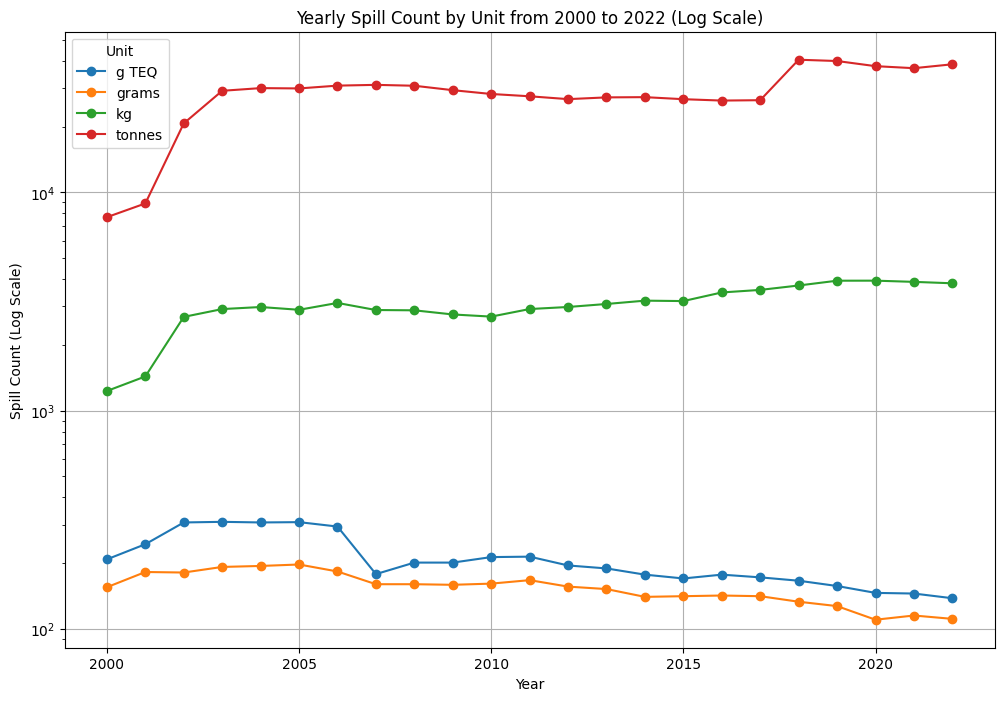

In [ ]:
# @title Yearly Spill Count from 2000 to 2022

# Define column names
year_column = 'reporting_year_année'
spill_amount_column = 'sum_of_release_to_all_media_1tonne'
units_column = 'units_unités'

# Step 1: Group by year and unit to calculate the spill count
yearly_unit_data = df.groupby([year_column, units_column]).agg(
    spill_count=('npri_id_no_inrp', 'count')  # Assuming each row is a spill
).reset_index()

# Step 2: Pivot the data so each unit has its own column
yearly_unit_pivot = yearly_unit_data.pivot(index=year_column, columns=units_column, values='spill_count').fillna(0)

# Step 3: Plot the Yearly Spill Count for each Unit
# Plotting with a log scale on the y-axis to accommodate scale differences
plt.figure(figsize=(12, 8))
for unit in yearly_unit_pivot.columns:
    plt.plot(yearly_unit_pivot.index, yearly_unit_pivot[unit], marker='o', linestyle='-', label=unit)

plt.yscale('log')  # Apply logarithmic scale
plt.title("Yearly Spill Count by Unit from 2000 to 2022 (Log Scale)")
plt.xlabel("Year")
plt.ylabel("Spill Count (Log Scale)")
plt.legend(title="Unit")
plt.grid(True)
plt.show()




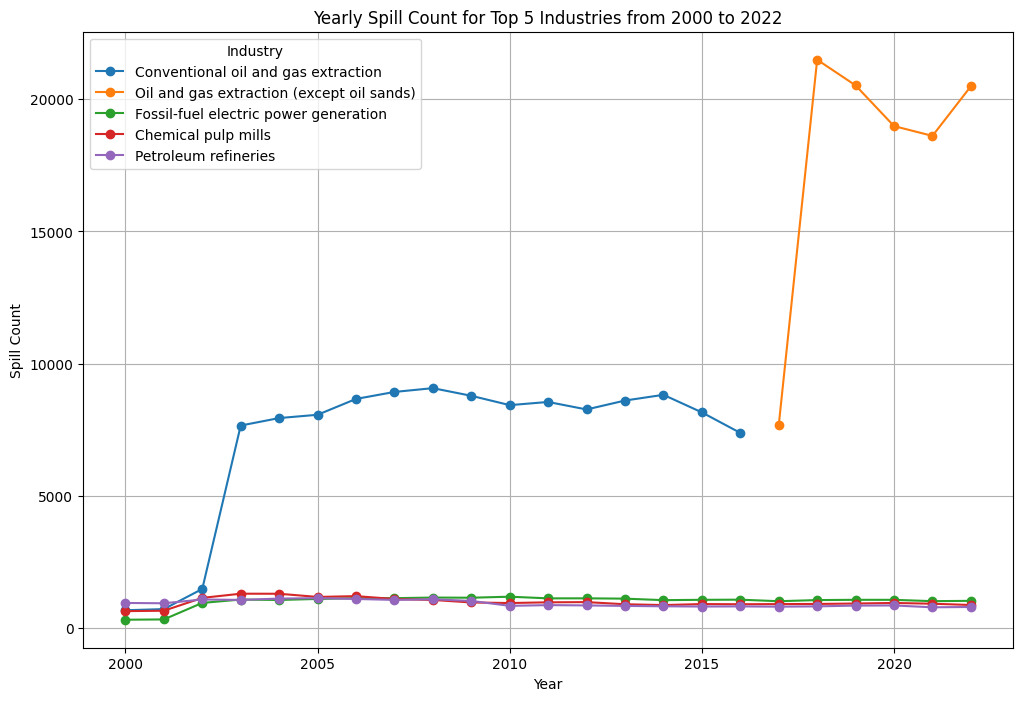

In [ ]:
# @title Yearly Spill Count for Top 5 Industries from 2000 to 2022
# Step 1: Set column names for grouping (assuming cleaned names in df)
year_column = 'reporting_year_année'
industry_column = 'naics_title_titre_code_scian'
spill_amount_column = 'sum_of_release_to_all_media_1tonne'

# Step 2: Group by year and industry to calculate spill counts and total amount spilled
industry_yearly_data = df.groupby([industry_column, year_column], observed=True).agg(
    spill_count=('npri_id_no_inrp', 'count'),  # Assuming each row is a spill
    total_amount_spilled=(spill_amount_column, 'sum')
).reset_index()


# Step 3: Identify the top 5 industries with the highest total spill counts over the entire dataset
top_industries = (
    industry_yearly_data.groupby(industry_column, observed=True)['spill_count'].sum()
    .nlargest(5)
    .index
)

# Filter the data to include only the top 5 industries
top_industries_data = industry_yearly_data[industry_yearly_data[industry_column].isin(top_industries)]


# Plotting Spill Count for Top 5 Industries
plt.figure(figsize=(12, 8))
for industry in top_industries:
    industry_data = top_industries_data[top_industries_data[industry_column] == industry]
    plt.plot(industry_data[year_column], industry_data['spill_count'], marker='o', label=industry)

plt.title("Yearly Spill Count for Top 5 Industries from 2000 to 2022")
plt.xlabel("Year")
plt.ylabel("Spill Count")
plt.legend(title="Industry")
plt.grid(True)
plt.show()


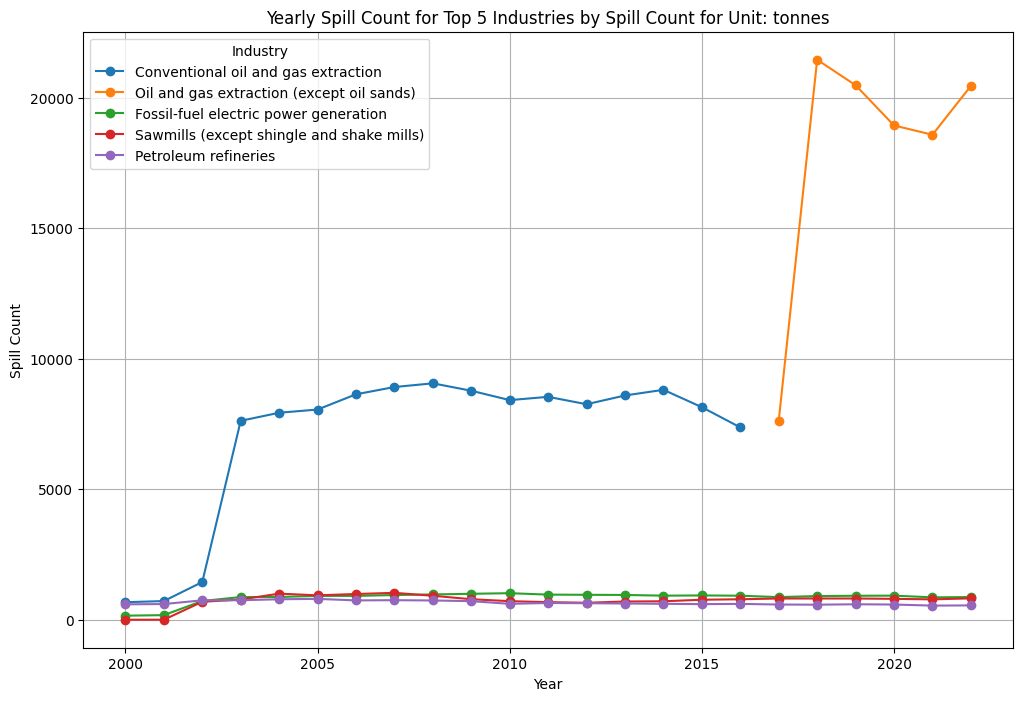

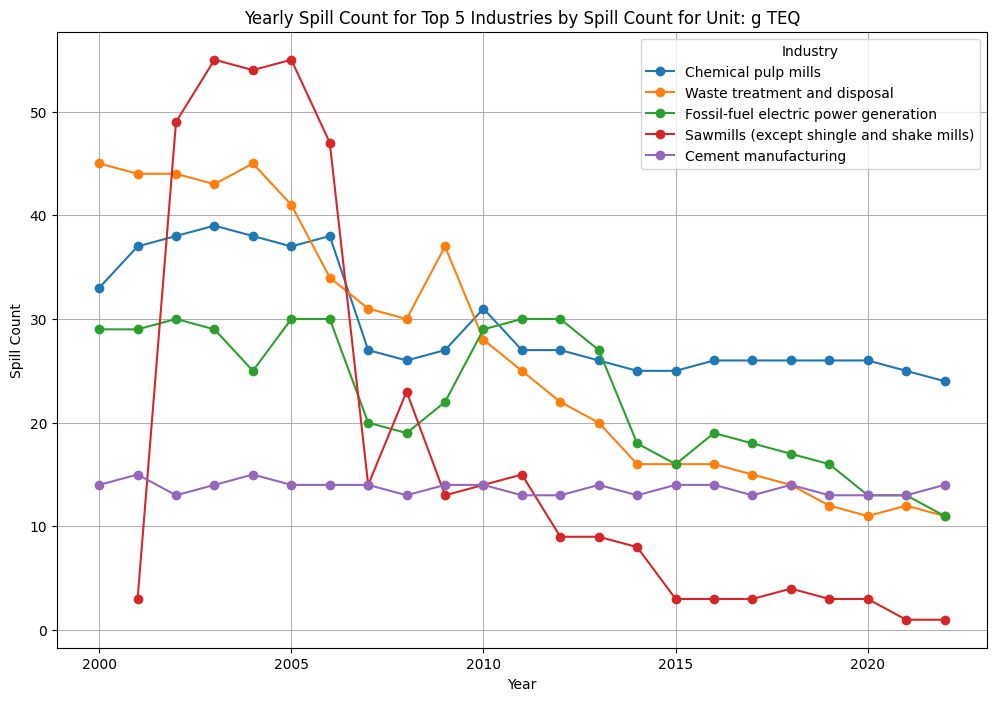

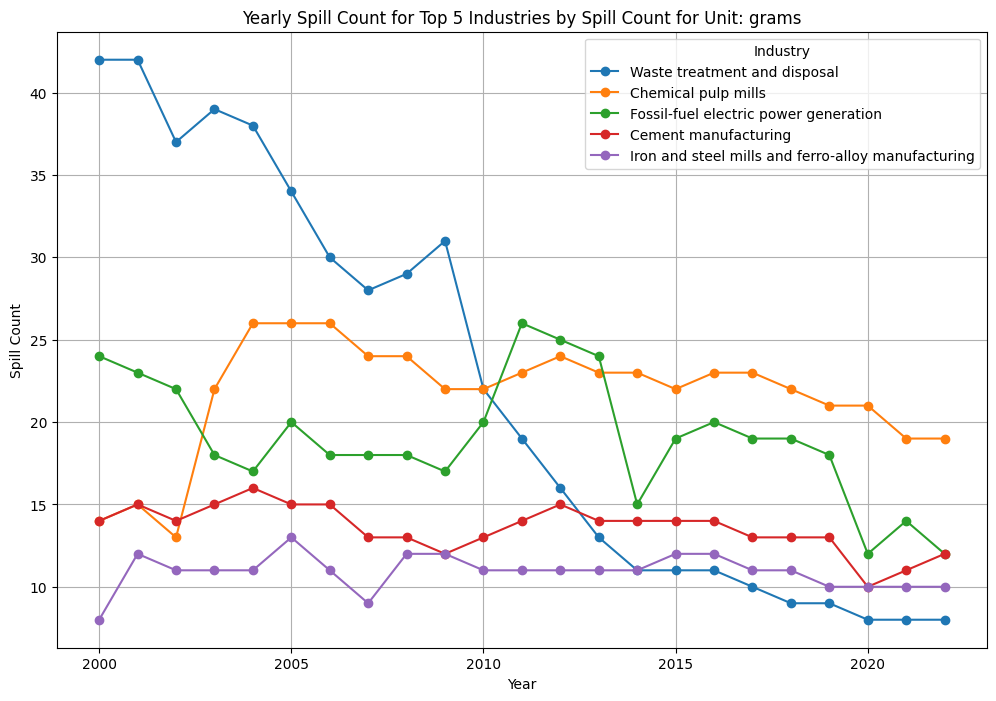

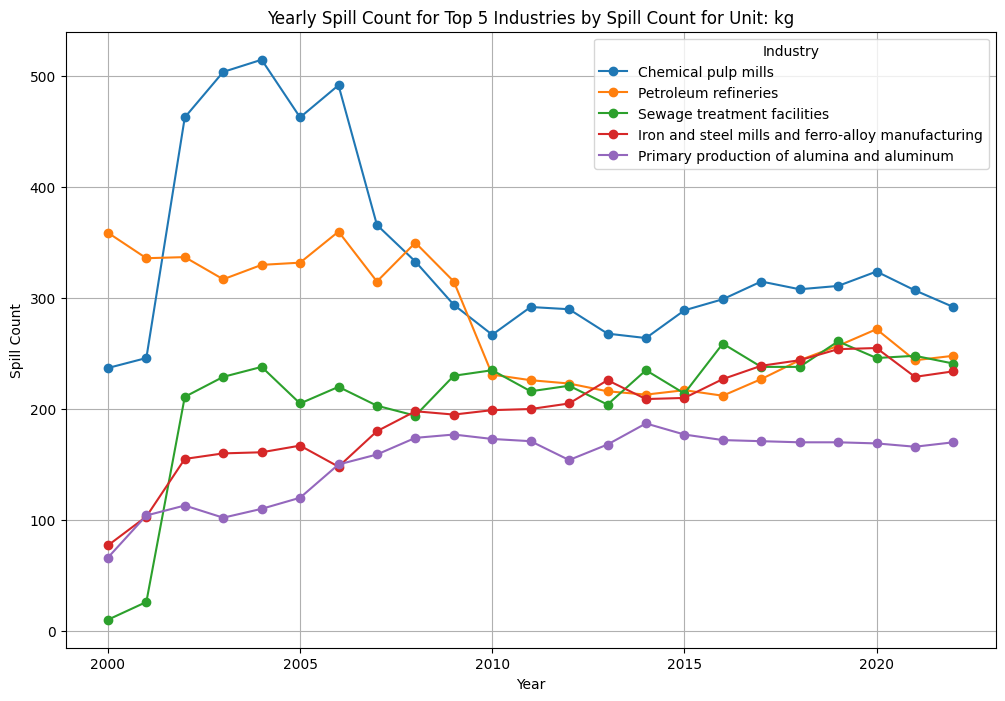

In [ ]:
# @title Yearly Spill Count for Top 5 Industries by Spill Count for Unit
# Define column names
year_column = 'reporting_year_année'
industry_column = 'naics_title_titre_code_scian'
spill_amount_column = 'sum_of_release_to_all_media_1tonne'
units_column = 'units_unités'

# Group by industry, year, and unit to calculate spill counts and total amount spilled
industry_year_unit_data = df.groupby([industry_column, year_column, units_column], observed=True).agg(
    spill_count=('npri_id_no_inrp', 'count'),  # Assuming each row is a spill
    total_amount_spilled=(spill_amount_column, 'sum')
).reset_index()

# Dictionary to store the top 5 industries for each unit
top_industries_by_unit = {}

# Loop through each unique unit to find the top 5 industries for that unit
for unit in industry_year_unit_data[units_column].unique():
    # Filter data for the current unit
    unit_data = industry_year_unit_data[industry_year_unit_data[units_column] == unit]

    # Find the top 5 industries based on total spill count for this unit
    top_industries = (
        unit_data.groupby(industry_column)['spill_count'].sum()
        .nlargest(5)
        .index
    )

    # Store the top industries for this unit in the dictionary
    top_industries_by_unit[unit] = top_industries


# Loop through each unique unit and create a plot for the top 5 industries
for unit, top_industries in top_industries_by_unit.items():
    # Filter data for the current unit and its top 5 industries
    unit_data = industry_year_unit_data[
        (industry_year_unit_data[units_column] == unit) &
        (industry_year_unit_data[industry_column].isin(top_industries))
    ]

    # Create a new plot for each unit
    plt.figure(figsize=(12, 8))
    for industry in top_industries:
        industry_data = unit_data[unit_data[industry_column] == industry]
        plt.plot(industry_data[year_column], industry_data['spill_count'], marker='o', linestyle='-', label=industry)

    plt.title(f"Yearly Spill Count for Top 5 Industries by Spill Count for Unit: {unit}")
    plt.xlabel("Year")
    plt.ylabel("Spill Count")
    plt.legend(title="Industry")
    plt.grid(True)
    plt.show()

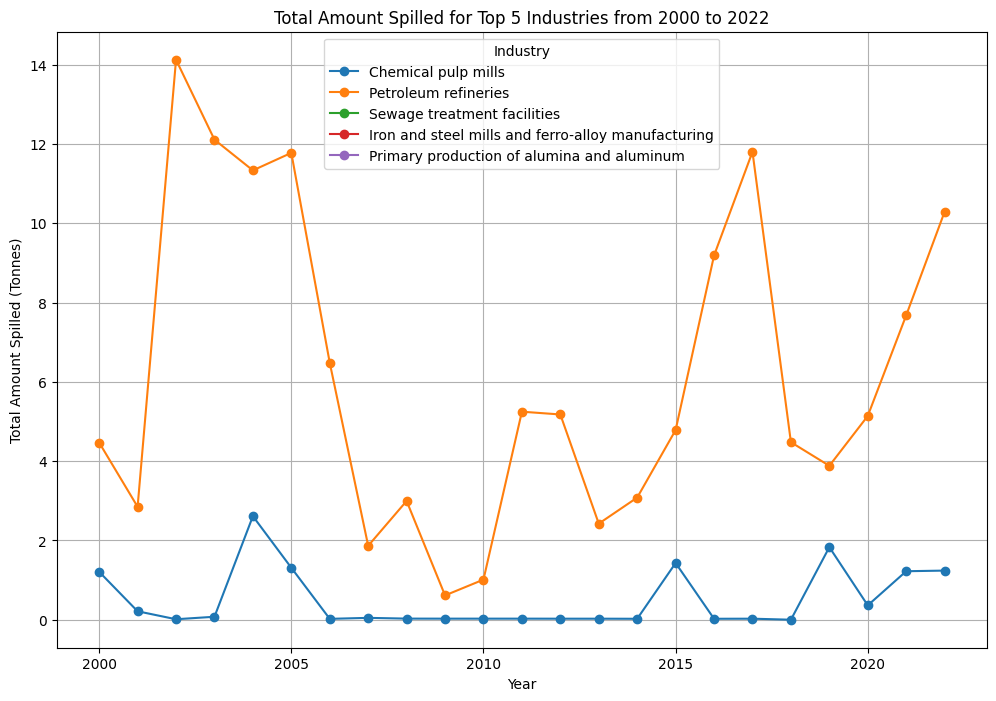

In [ ]:
# @title Total Amount Spilled for Top 5 Industries from 2000 to 2022
# Plotting Total Amount Spilled for Top 5 Industries
plt.figure(figsize=(12, 8))
for industry in top_industries:
    industry_data = top_industries_data[top_industries_data[industry_column] == industry]
    plt.plot(industry_data[year_column], industry_data['total_amount_spilled'], marker='o', label=industry)

plt.title("Total Amount Spilled for Top 5 Industries from 2000 to 2022")
plt.xlabel("Year")
plt.ylabel("Total Amount Spilled (Tonnes)")
plt.legend(title="Industry")
plt.grid(True)
plt.show()


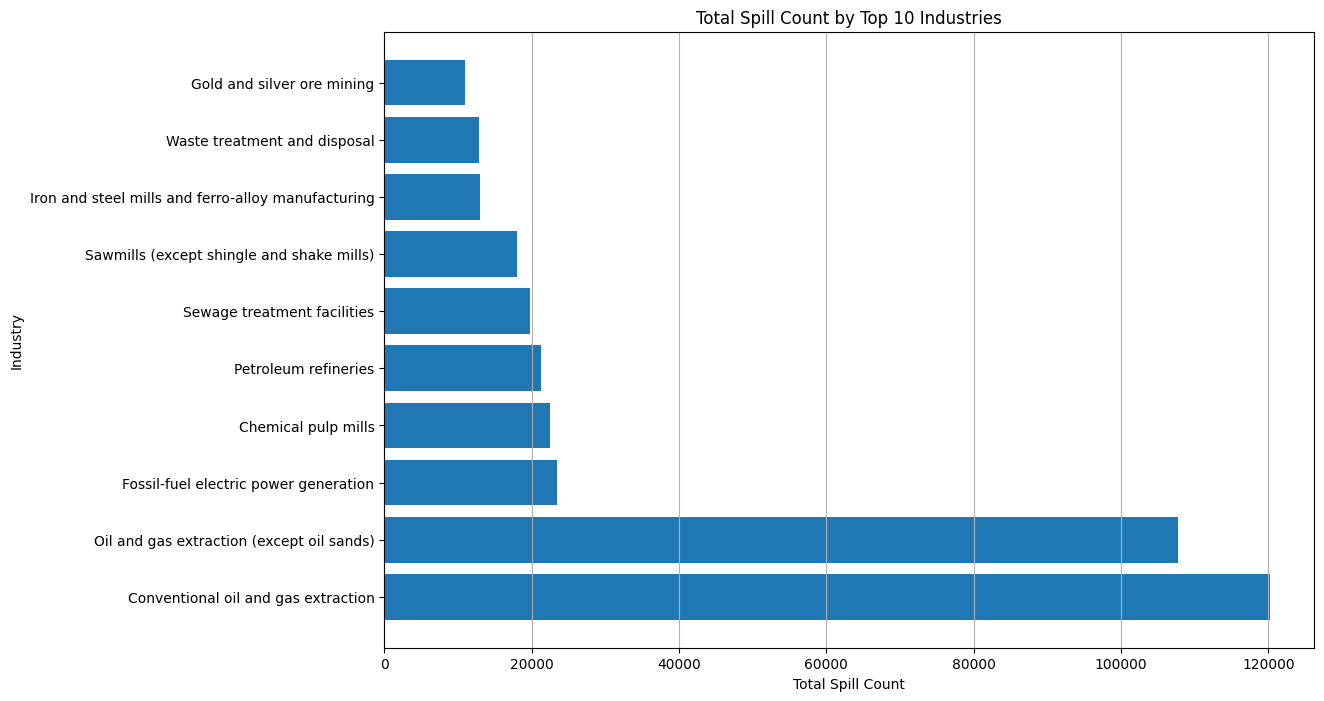

In [ ]:
# @title Total Spill Count by Top 10 Industries

industry_column = 'naics_title_titre_code_scian'
spill_amount_column = 'sum_of_release_to_all_media_1tonne'

# Calculate total spill counts and total amount spilled by industry
industry_totals = df.groupby(industry_column, observed=True).agg(
    total_spill_count=('npri_id_no_inrp', 'count'),  # Assuming each row is a spill
    total_amount_spilled=(spill_amount_column, 'sum')
).reset_index()

# Sort by total spill count and select the top 10 industries
top_10_industries = industry_totals.nlargest(10, 'total_spill_count')

# Plotting Total Spill Counts for Top 10 Industries
plt.figure(figsize=(12, 8))
plt.barh(top_10_industries[industry_column], top_10_industries['total_spill_count'])
plt.xlabel("Total Spill Count")
plt.ylabel("Industry")
plt.title("Total Spill Count by Top 10 Industries")
plt.grid(True, axis='x')
plt.show()

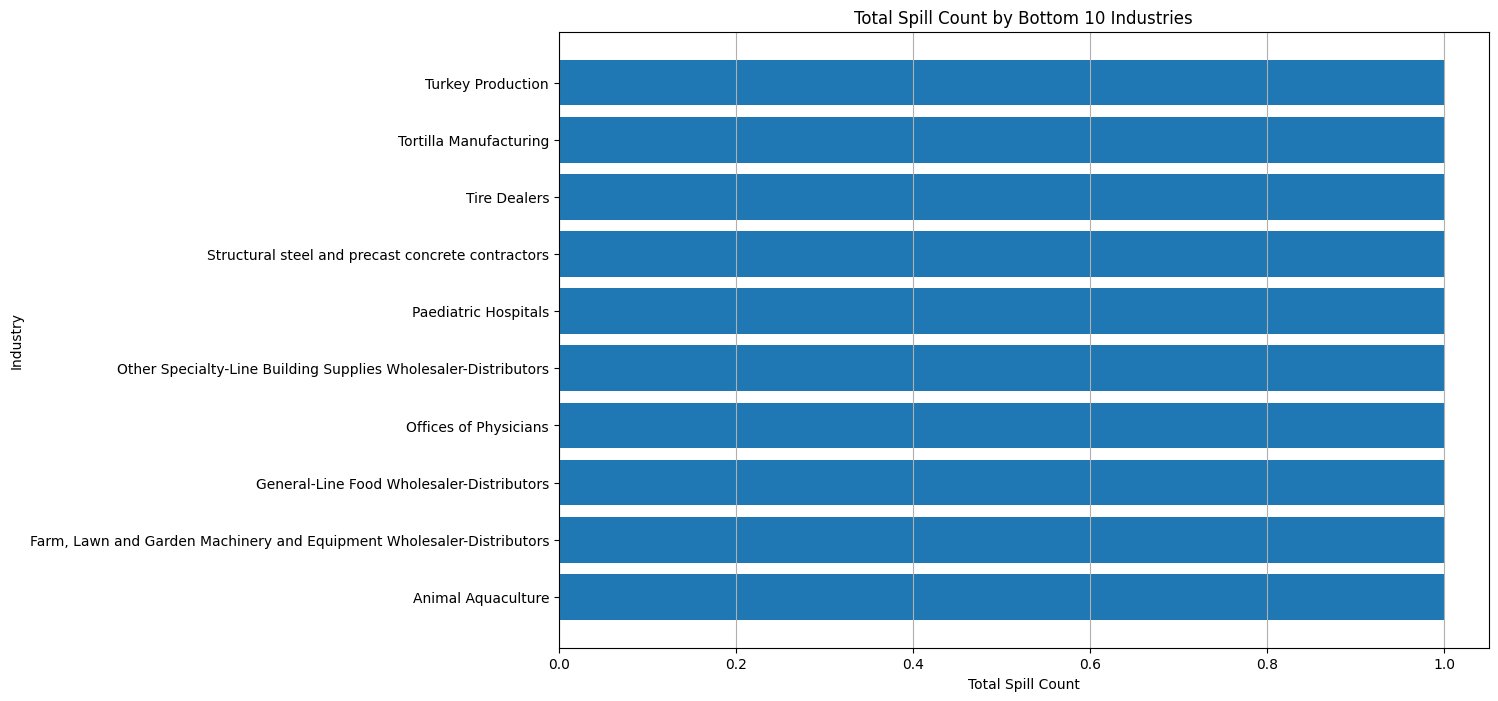

In [ ]:
# @title Total Spill Count by Bottom 10 Industries


industry_column = 'naics_title_titre_code_scian'
spill_amount_column = 'sum_of_release_to_all_media_1tonne'

# Calculate total spill counts and total amount spilled by industry
industry_totals = df.groupby(industry_column, observed=True).agg(
    total_spill_count=('npri_id_no_inrp', 'count'),  # Assuming each row is a spill
    total_amount_spilled=(spill_amount_column, 'sum')
).reset_index()

# Sort by total spill count in ascending order and select the bottom 10 industries
bottom_10_industries = industry_totals.nsmallest(10, 'total_spill_count')

# Plotting Total Spill Counts for Bottom 10 Industries
plt.figure(figsize=(12, 8))
plt.barh(bottom_10_industries[industry_column], bottom_10_industries['total_spill_count'])
plt.xlabel("Total Spill Count")
plt.ylabel("Industry")
plt.title("Total Spill Count by Bottom 10 Industries")
plt.grid(True, axis='x')
plt.show()


In [ ]:
# Industry with the most spills
industry_most_spills = industry_totals.loc[industry_totals['total_spill_count'].idxmax()]
print("Industry with Most Spills:", industry_most_spills[industry_column])
print("Total Spill Count:", industry_most_spills['total_spill_count'])

# Industry with the highest spill volume
industry_highest_spill_volume = industry_totals.loc[industry_totals['total_amount_spilled'].idxmax()]
print("Industry with Highest Spill Volume:", industry_highest_spill_volume[industry_column])
print("Total Amount Spilled:", industry_highest_spill_volume['total_amount_spilled'])


Industry with Most Spills: Conventional oil and gas extraction
Total Spill Count: 120204
Industry with Highest Spill Volume: Chemical fertilizer (except potash) manufacturing
Total Amount Spilled: 623.9456700000001


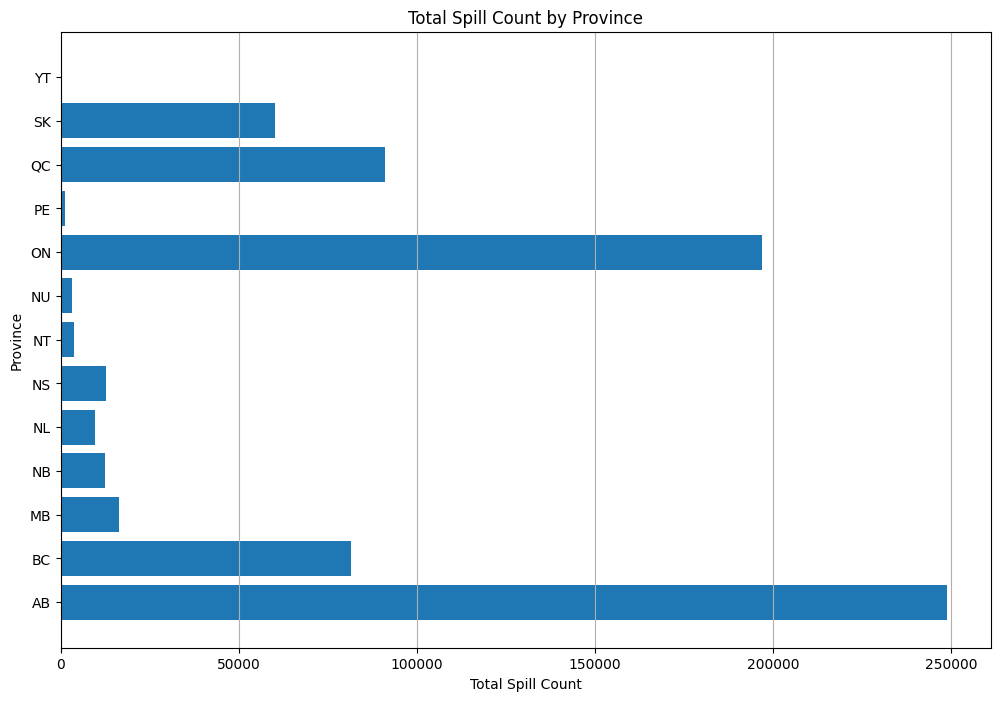

In [ ]:
# @title Total Spill Count by Province



province_column = 'province'
spill_amount_column = 'sum_of_release_to_all_media_1tonne'

# Group by province to calculate total spill counts and total amount spilled
province_totals = df.groupby(province_column, observed=True).agg(
    total_spill_count=('npri_id_no_inrp', 'count'),  # Assuming each row is a spill
    total_amount_spilled=(spill_amount_column, 'sum')
).reset_index()

# Plotting Total Spill Counts by Province
plt.figure(figsize=(12, 8))
plt.barh(province_totals[province_column], province_totals['total_spill_count'])
plt.xlabel("Total Spill Count")
plt.ylabel("Province")
plt.title("Total Spill Count by Province")
plt.grid(True, axis='x')
plt.show()


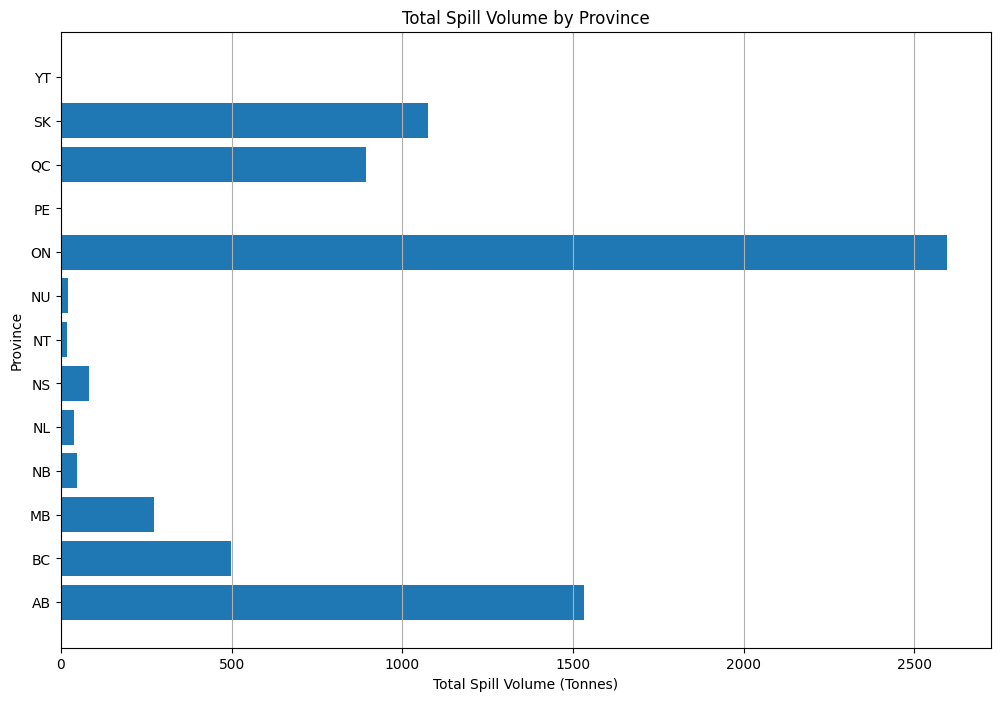

In [ ]:
# @title Total Spill Volumes by Province



plt.figure(figsize=(12, 8))
plt.barh(province_totals[province_column], province_totals['total_amount_spilled'])
plt.xlabel("Total Spill Volume (Tonnes)")
plt.ylabel("Province")
plt.title("Total Spill Volume by Province")
plt.grid(True, axis='x')
plt.show()


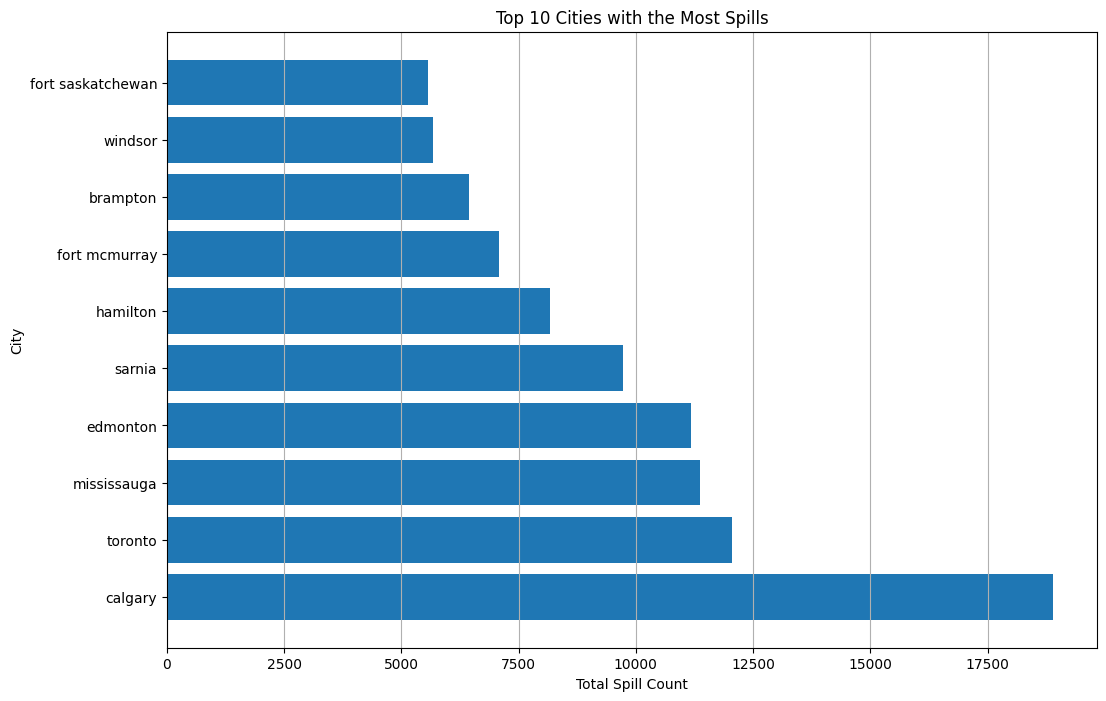

In [ ]:
# @title Top 10 Cities with the Most Spills
# Define the city column name
city_column = 'city'

# Convert city names to lowercase and strip any extra whitespace
df[city_column] = df[city_column].str.lower().str.strip()

# Group by city to calculate total spill counts, now with cleaned city names
city_totals = df.groupby(city_column, observed=True).agg(
    total_spill_count=('npri_id_no_inrp', 'count')
).reset_index()

# Filter out rows where city is "0", empty, or "na"
city_totals = city_totals[~city_totals[city_column].isin(["0", "", "na"])]

# Sort by spill count and select the top 10 cities with the most spills
top_cities = city_totals.nlargest(10, 'total_spill_count')

# Plotting Total Spill Counts by Top Cities
plt.figure(figsize=(12, 8))
plt.barh(top_cities[city_column], top_cities['total_spill_count'])
plt.xlabel("Total Spill Count")
plt.ylabel("City")
plt.title("Top 10 Cities with the Most Spills")
plt.grid(True, axis='x')
plt.show()


In [ ]:
# @title Top #5 most spilled facilities per province and territories
# Define necessary columns
province_column = 'province'
npri_id_column = 'npri_id_no_inrp'
spill_amount_column = 'sum_of_release_to_all_media_1tonne'
latitude_column = 'latitude'
longitude_column = 'longitude'

# Group by province and NPRI ID to calculate the total spill count and amount spilled
facility_spill_data = df.groupby([province_column, npri_id_column, latitude_column, longitude_column], observed=True).agg(
    total_spill_count=('npri_id_no_inrp', 'count'),  # Count occurrences as spills
    total_amount_spilled=(spill_amount_column, 'sum')
).reset_index()

# Sort within each province by spill count to get the top 5 NPRI IDs
top_5_facilities_by_province = facility_spill_data.groupby(province_column).apply(
    lambda x: x.nlargest(5, 'total_spill_count')
).reset_index(drop=True)

# Add a ranking column within each province, with 1 being the highest spill count
top_5_facilities_by_province['rank'] = top_5_facilities_by_province.groupby(province_column)['total_spill_count'].rank(
    method='first', ascending=False).astype(int)

import folium

# Initialize the Folium map centered on Canada
m = folium.Map(location=[56.1304, -106.3468], zoom_start=4)

# Define a color dictionary with abbreviations for each province
province_colors = {
    "AB": "#1f77b4",  # Blue
    "BC": "#ff7f0e",  # Orange
    "MB": "#2ca02c",  # Green
    "NB": "#d62728",  # Red
    "NL": "#9467bd",  # Purple
    "NS": "#8c564b",  # Brown
    "ON": "#e377c2",  # Pink
    "PE": "#7f7f7f",  # Gray
    "QC": "#bcbd22",  # Yellow-Green
    "SK": "#17becf"   # Cyan
}

# Loop through the DataFrame to create markers for each top facility
for index, row in top_5_facilities_by_province.iterrows():
    province = row[province_column].upper().strip()  # Standardize to uppercase for matching
    npri_id = row[npri_id_column]
    latitude = row[latitude_column]
    longitude = row[longitude_column]
    spill_count = row['total_spill_count']
    total_spilled = row['total_amount_spilled']
    rank = row['rank']  # Get the rank for this facility

    # Get the color for the current province abbreviation
    color = province_colors.get(province, "#808080")  # Default to gray if the province is missing

    # Create a popup text for each facility marker
    popup_text = f"<strong>Province:</strong> {province}<br>"
    popup_text += f"<strong>NPRI ID:</strong> {npri_id}<br>"
    popup_text += f"<strong>Total Spill Count:</strong> {spill_count}<br>"
    popup_text += f"<strong>Total Amount Spilled:</strong> {total_spilled} tonnes<br>"
    popup_text += f"<strong>Rank:</strong> {rank}"

    # Add a circular marker with the rank inside, colored by province
    folium.Marker(
        location=[latitude, longitude],
        popup=folium.Popup(popup_text, max_width=300),
        tooltip=f"{province} - Rank {rank}",
        icon=folium.DivIcon(html=f"""
            <div style="
                display: flex;
                align-items: center;
                justify-content: center;
                width: 28px;
                height: 28px;
                border-radius: 50%;
                background-color: {color};
                color: white;
                font-weight: bold;
                font-size: 14pt;
                border: 2px solid {color};
                text-align: center;
            ">{rank}</div>
        """)
    ).add_to(m)

# Display the map
m


<ipython-input-28-8db29d95ede0>:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_facilities_by_province = facility_spill_data.groupby(province_column).apply(


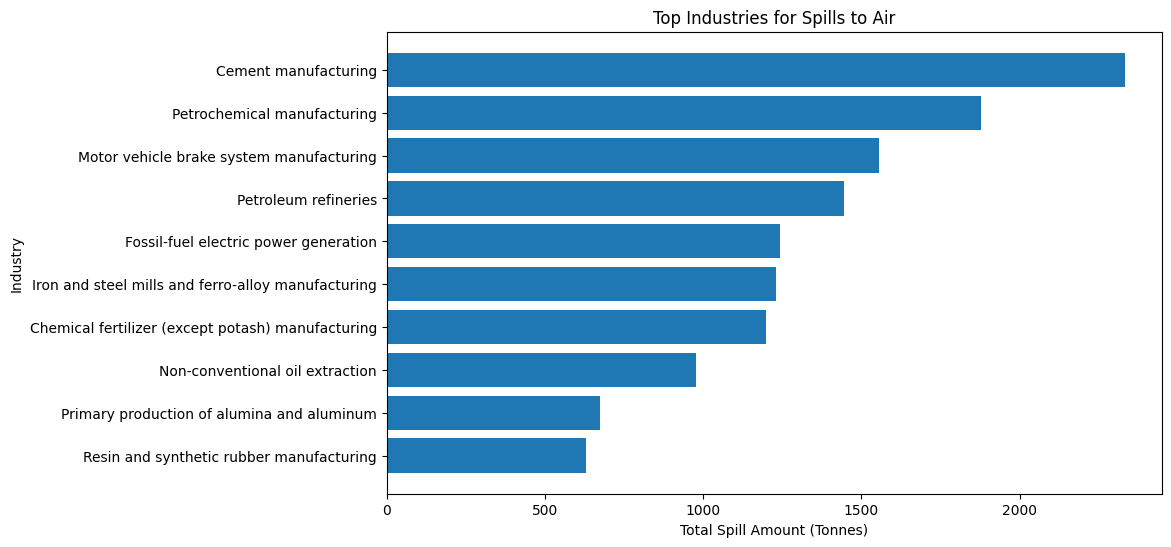

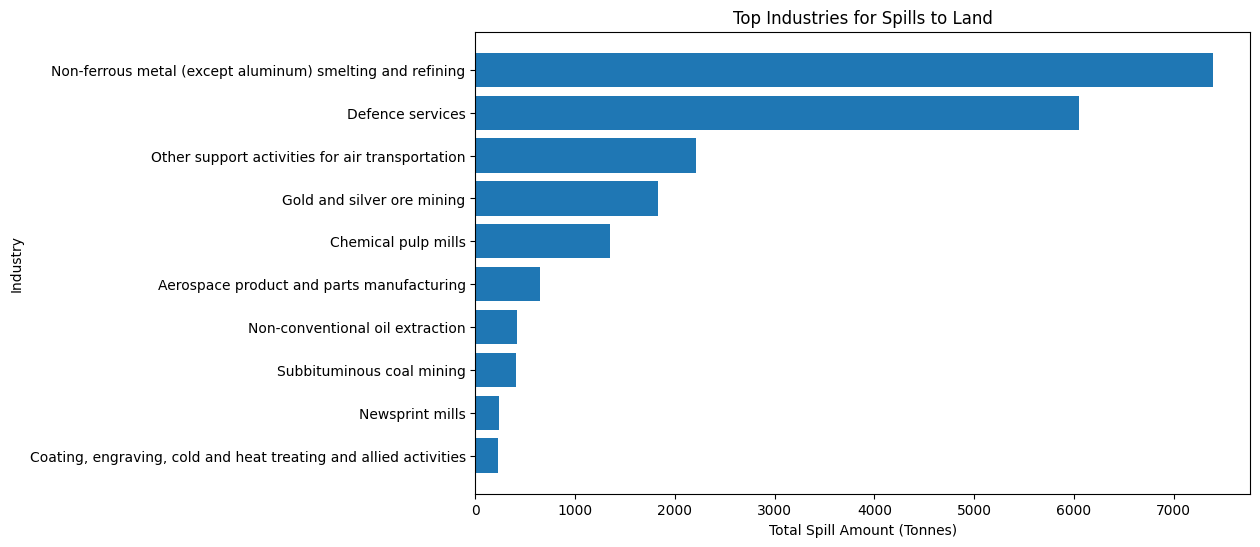

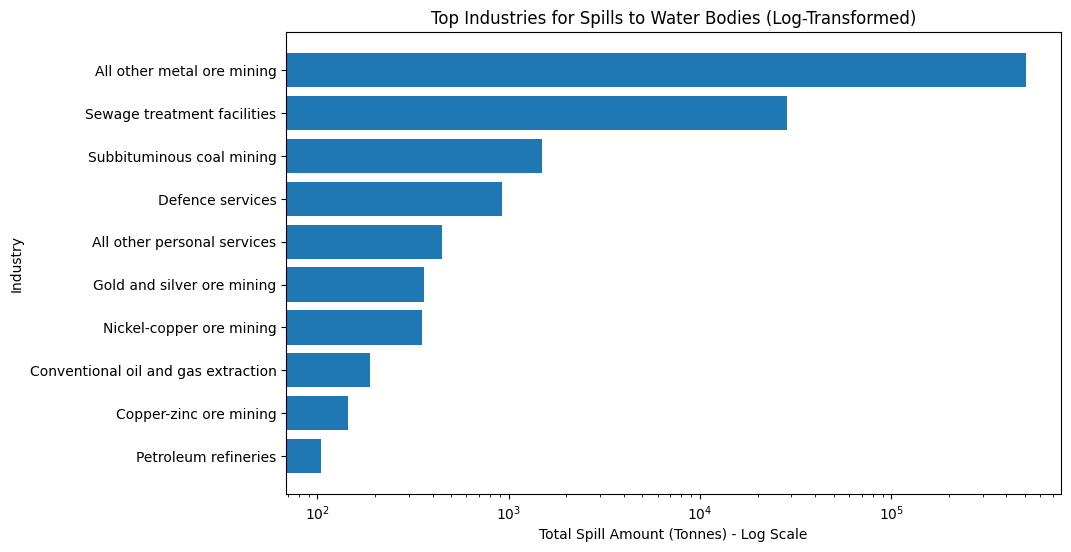

In [ ]:
# @title Industries with most spills in AIR, LAND, and WATER BODIES


# Aggregate data by industry for each spill type
air_spills_by_industry = df.groupby('naics_title_titre_code_scian')['release_to_air_spills'].sum().reset_index()
land_spills_by_industry = df.groupby('naics_title_titre_code_scian')['releases_to_land_spills'].sum().reset_index()
water_spills_by_industry = df.groupby('naics_title_titre_code_scian')['releases_to_water_bodies_spills'].sum().reset_index()

# Sort each spill type in descending order to get the top industries
air_spills_by_industry = air_spills_by_industry.sort_values(by='release_to_air_spills', ascending=False)
land_spills_by_industry = land_spills_by_industry.sort_values(by='releases_to_land_spills', ascending=False)
water_spills_by_industry = water_spills_by_industry.sort_values(by='releases_to_water_bodies_spills', ascending=False)

import matplotlib.pyplot as plt

# Plot 1: Top industries for air spills
plt.figure(figsize=(10, 6))
plt.barh(air_spills_by_industry['naics_title_titre_code_scian'][:10], air_spills_by_industry['release_to_air_spills'][:10])
plt.xlabel("Total Spill Amount (Tonnes)")
plt.ylabel("Industry")
plt.title("Top Industries for Spills to Air")
plt.gca().invert_yaxis()  # Highest spill amount on top
plt.show()

# Plot 2: Top industries for land spills
plt.figure(figsize=(10, 6))
plt.barh(land_spills_by_industry['naics_title_titre_code_scian'][:10], land_spills_by_industry['releases_to_land_spills'][:10])
plt.xlabel("Total Spill Amount (Tonnes)")
plt.ylabel("Industry")
plt.title("Top Industries for Spills to Land")
plt.gca().invert_yaxis()  # Highest spill amount on top
plt.show()

# Plot 3: Top industries for water spills with log scale
plt.figure(figsize=(10, 6))
plt.barh(water_spills_by_industry['naics_title_titre_code_scian'][:10], water_spills_by_industry['releases_to_water_bodies_spills'][:10])
plt.xlabel("Total Spill Amount (Tonnes) - Log Scale")
plt.ylabel("Industry")
plt.title("Top Industries for Spills to Water Bodies (Log-Transformed)")
plt.xscale('log')  # Apply log scale to x-axis
plt.gca().invert_yaxis()  # Highest spill amount on top
plt.show()



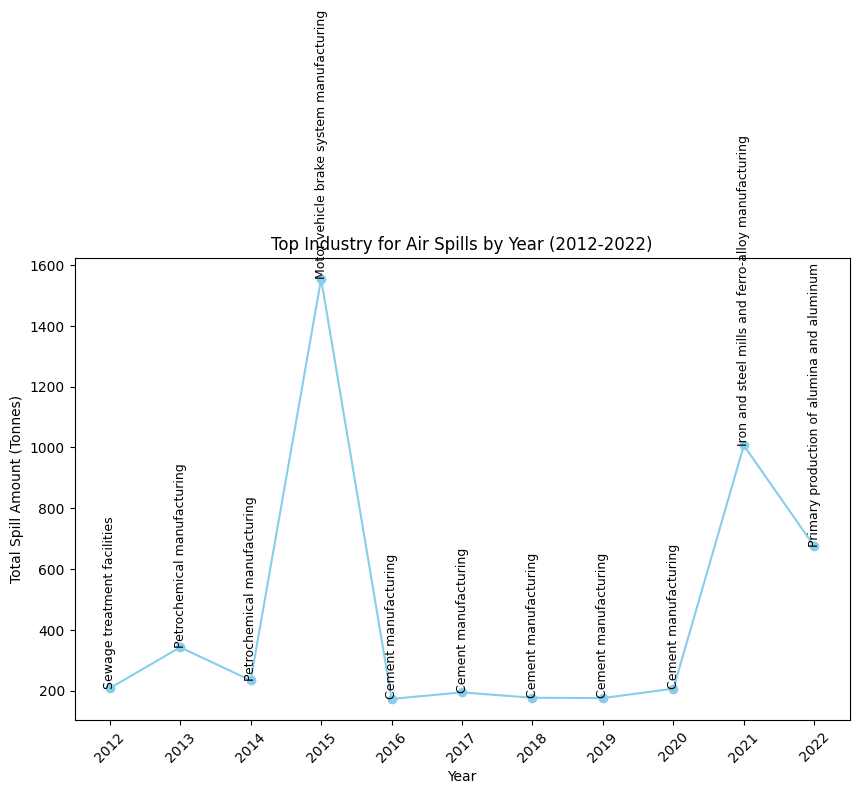

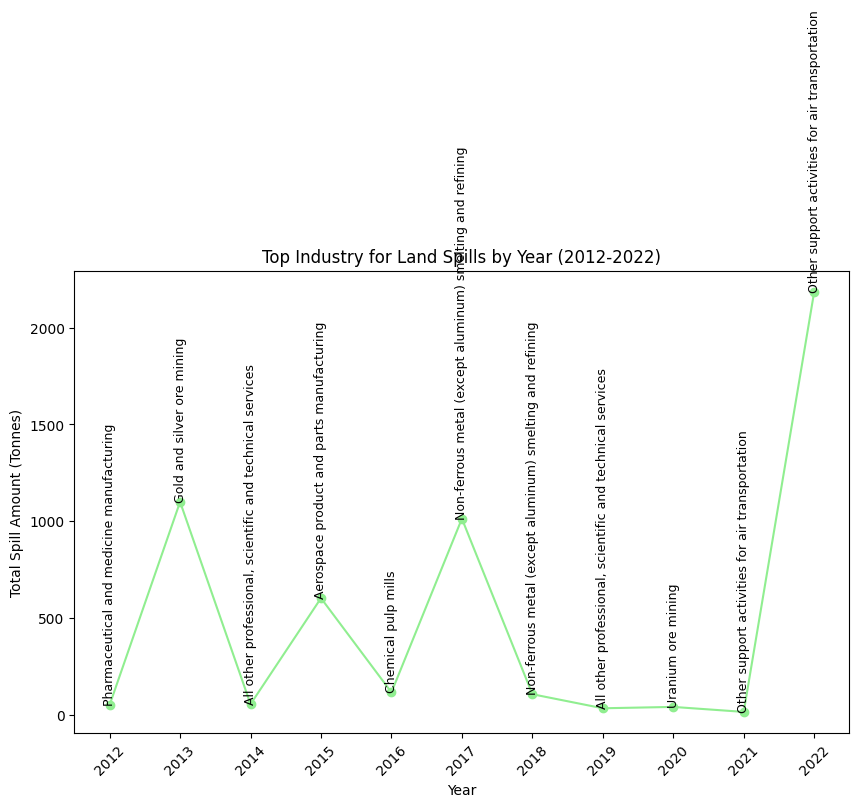

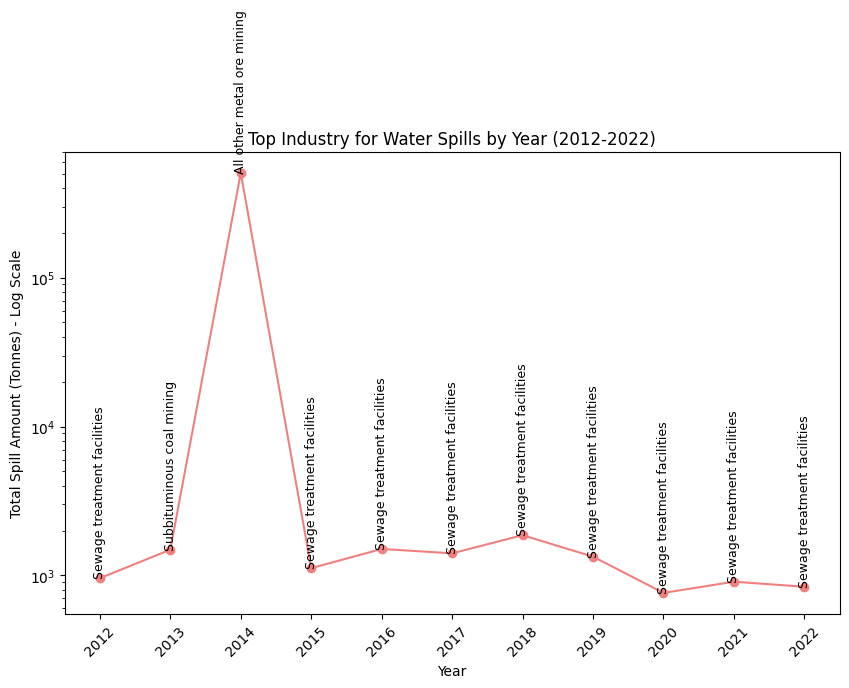

In [ ]:
# @title Top Industrie most spilled by Year


# Filter data to include only records from 2012 to 2022
df_filtered = df[(df['reporting_year_année'] >= 2012) & (df['reporting_year_année'] <= 2022)]

# Aggregate spills by year and industry for each spill type
air_spills = df_filtered.groupby(['reporting_year_année', 'naics_title_titre_code_scian'])['release_to_air_spills'].sum().reset_index()
land_spills = df_filtered.groupby(['reporting_year_année', 'naics_title_titre_code_scian'])['releases_to_land_spills'].sum().reset_index()
water_spills = df_filtered.groupby(['reporting_year_année', 'naics_title_titre_code_scian'])['releases_to_water_bodies_spills'].sum().reset_index()


# Function to find the top industry for each year
def get_top_industry_per_year(df, spill_column):
    return df.loc[df.groupby('reporting_year_année')[spill_column].idxmax()]

# Get the top industry per year for air, land, and water
top_air_spills = get_top_industry_per_year(air_spills, 'release_to_air_spills')
top_land_spills = get_top_industry_per_year(land_spills, 'releases_to_land_spills')
top_water_spills = get_top_industry_per_year(water_spills, 'releases_to_water_bodies_spills')




# Plot 1: Top industry for air spills each year from 2012 to 2022 (Line Graph)
plt.figure(figsize=(10, 6))
plt.plot(top_air_spills['reporting_year_année'], top_air_spills['release_to_air_spills'], color='skyblue', marker='o', linestyle='-')
plt.xticks(top_air_spills['reporting_year_année'], rotation=45)
plt.xlabel("Year")
plt.ylabel("Total Spill Amount (Tonnes)")
plt.title("Top Industry for Air Spills by Year (2012-2022)")

# Add industry labels on top of each point
for year, amount, industry in zip(top_air_spills['reporting_year_année'],
                                  top_air_spills['release_to_air_spills'],
                                  top_air_spills['naics_title_titre_code_scian']):
    plt.text(year, amount, industry, ha='center', va='bottom', fontsize=9, rotation=90)

plt.show()

# Plot 2: Top industry for land spills each year from 2012 to 2022 (Line Graph)
plt.figure(figsize=(10, 6))
plt.plot(top_land_spills['reporting_year_année'], top_land_spills['releases_to_land_spills'], color='lightgreen', marker='o', linestyle='-')
plt.xticks(top_land_spills['reporting_year_année'], rotation=45)
plt.xlabel("Year")
plt.ylabel("Total Spill Amount (Tonnes)")
plt.title("Top Industry for Land Spills by Year (2012-2022)")

# Add industry labels on top of each point
for year, amount, industry in zip(top_land_spills['reporting_year_année'],
                                  top_land_spills['releases_to_land_spills'],
                                  top_land_spills['naics_title_titre_code_scian']):
    plt.text(year, amount, industry, ha='center', va='bottom', fontsize=9, rotation=90)

plt.show()

# Plot 3: Top industry for water spills each year from 2012 to 2022 with log scale (Line Graph)
plt.figure(figsize=(10, 6))
plt.plot(top_water_spills['reporting_year_année'], top_water_spills['releases_to_water_bodies_spills'], color='lightcoral', marker='o', linestyle='-')
plt.xticks(top_water_spills['reporting_year_année'], rotation=45)
plt.xlabel("Year")
plt.ylabel("Total Spill Amount (Tonnes) - Log Scale")
plt.title("Top Industry for Water Spills by Year (2012-2022)")
plt.yscale('log')  # Apply log scale to y-axis

# Add industry labels on top of each point
for year, amount, industry in zip(top_water_spills['reporting_year_année'],
                                  top_water_spills['releases_to_water_bodies_spills'],
                                  top_water_spills['naics_title_titre_code_scian']):
    plt.text(year, amount, industry, ha='center', va='bottom', fontsize=9, rotation=90)

plt.show()



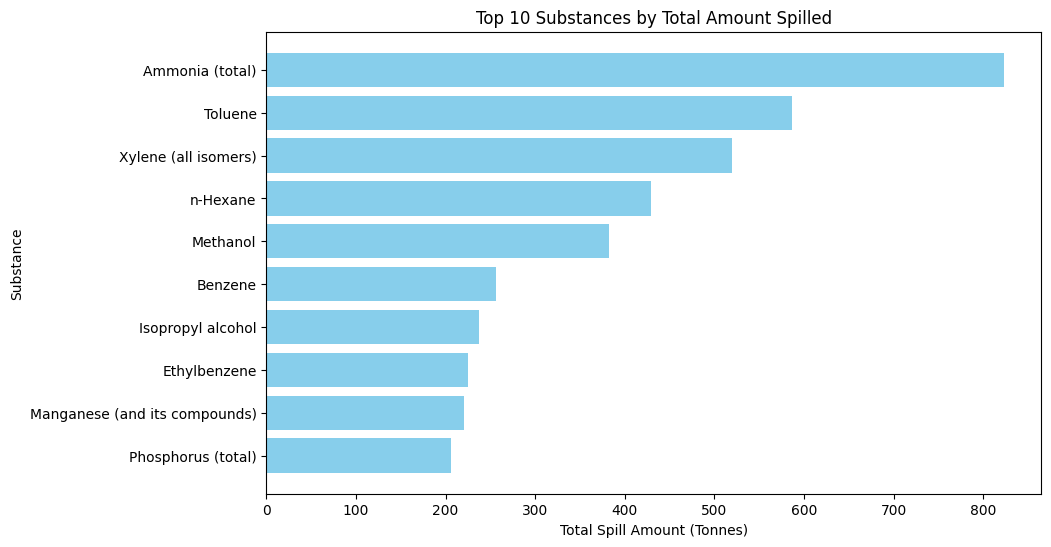

In [ ]:
# @title Top 10 Substances by Total Amount Spilled


# Aggregate the data to get total spill amounts per substance
top_substances = df.groupby('substance_name_english_nom_de_substance_anglais')['sum_of_release_to_all_media_1tonne'].sum()
top_substances = top_substances.sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_substances.index, top_substances.values, color='skyblue')
plt.xlabel("Total Spill Amount (Tonnes)")
plt.ylabel("Substance")
plt.title("Top 10 Substances by Total Amount Spilled")
plt.gca().invert_yaxis()  # Highest amount on top
plt.show()

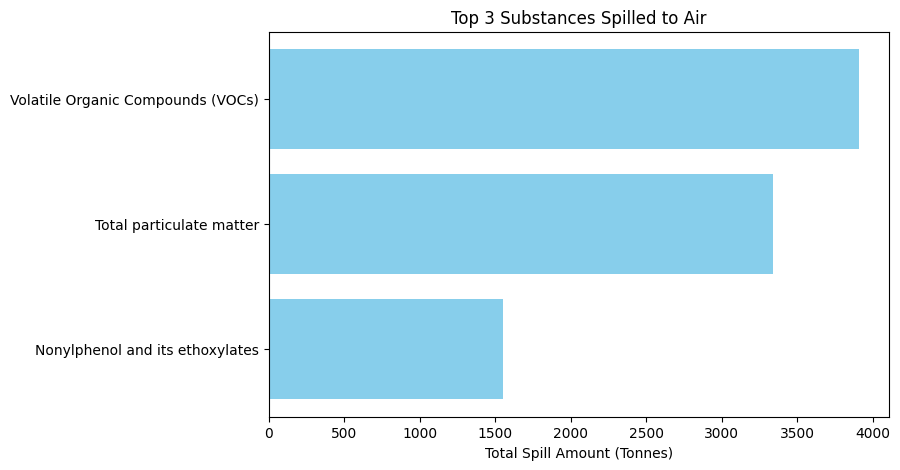

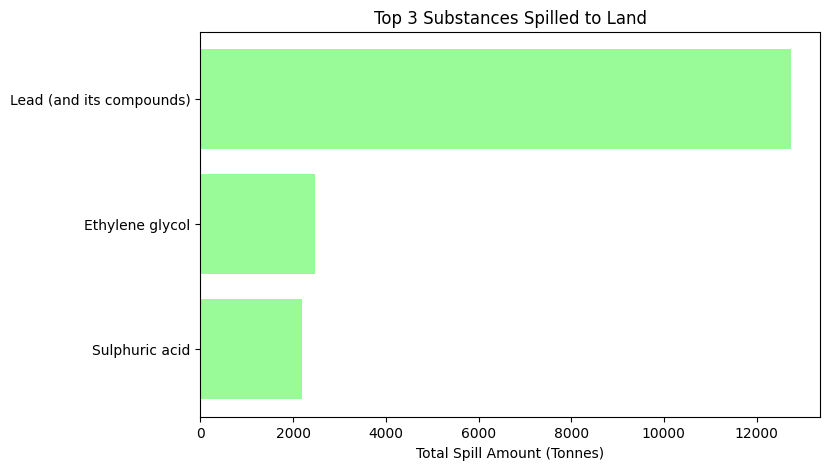

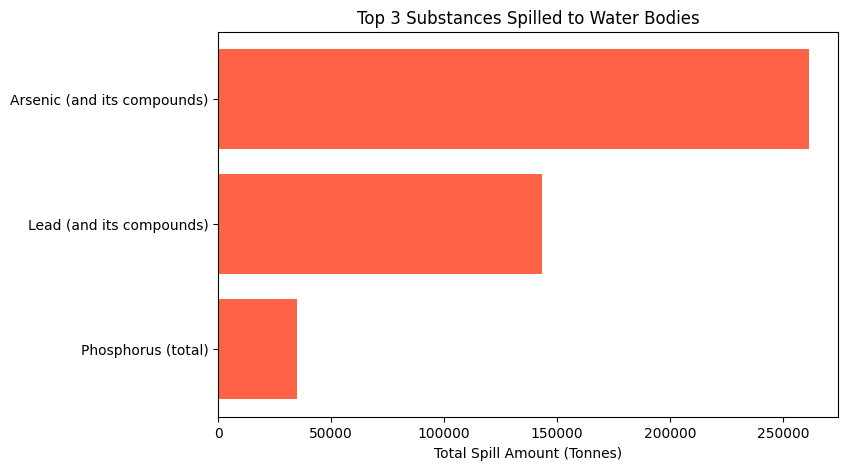

In [ ]:
# @title Top 3 Substances by its realease type



# Step 1: Aggregate data by substance and spill type
top_substances_medium = df.groupby(['substance_name_english_nom_de_substance_anglais']).agg({
    'release_to_air_spills': 'sum',
    'releases_to_land_spills': 'sum',
    'releases_to_water_bodies_spills': 'sum'
}).reset_index()

# Step 2: Identify the top 3 substances for each medium
top_air_spills = top_substances_medium.nlargest(3, 'release_to_air_spills')[['substance_name_english_nom_de_substance_anglais', 'release_to_air_spills']]
top_land_spills = top_substances_medium.nlargest(3, 'releases_to_land_spills')[['substance_name_english_nom_de_substance_anglais', 'releases_to_land_spills']]
top_water_spills = top_substances_medium.nlargest(3, 'releases_to_water_bodies_spills')[['substance_name_english_nom_de_substance_anglais', 'releases_to_water_bodies_spills']]

# Step 3: Plot each medium separately

# Plot for Air Spills
plt.figure(figsize=(8, 5))
plt.barh(top_air_spills['substance_name_english_nom_de_substance_anglais'], top_air_spills['release_to_air_spills'], color='#87CEEB')
plt.xlabel("Total Spill Amount (Tonnes)")
plt.title("Top 3 Substances Spilled to Air")
plt.gca().invert_yaxis()  # Highest spill amount on top
plt.show()

# Plot for Land Spills
plt.figure(figsize=(8, 5))
plt.barh(top_land_spills['substance_name_english_nom_de_substance_anglais'], top_land_spills['releases_to_land_spills'], color='#98FB98')
plt.xlabel("Total Spill Amount (Tonnes)")
plt.title("Top 3 Substances Spilled to Land")
plt.gca().invert_yaxis()  # Highest spill amount on top
plt.show()

# Plot for Water Bodies Spills
plt.figure(figsize=(8, 5))
plt.barh(top_water_spills['substance_name_english_nom_de_substance_anglais'], top_water_spills['releases_to_water_bodies_spills'], color='#FF6347')
plt.xlabel("Total Spill Amount (Tonnes)")
plt.title("Top 3 Substances Spilled to Water Bodies")
plt.gca().invert_yaxis()  # Highest spill amount on top
plt.show()


<ipython-input-33-1053da178bf1>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_substances_per_province = province_substance_spills.groupby('province').apply(


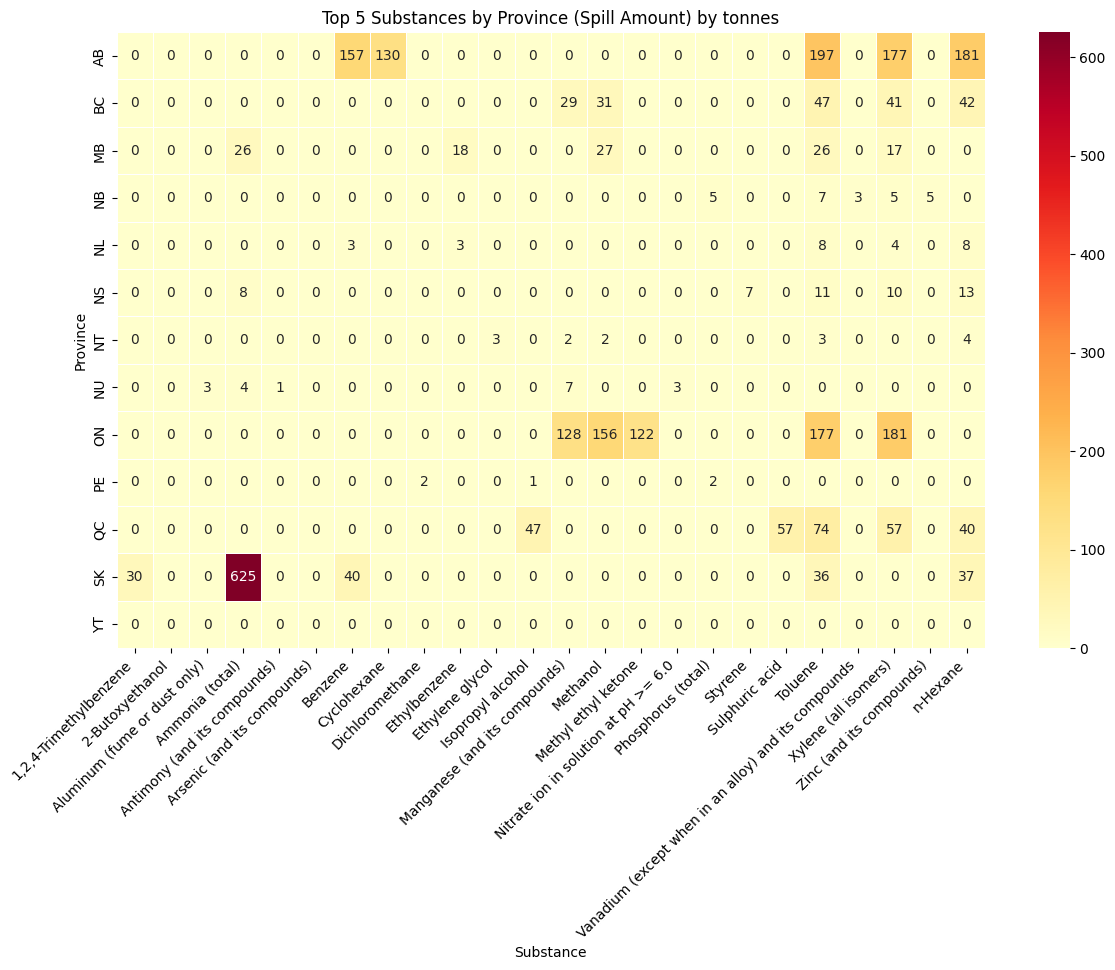

In [ ]:
# @title Heatmap - Top 5 Substances by Province (Spill Amount)




# Aggregate spill amounts by province and substance
province_substance_spills = df.groupby(['province', 'substance_name_english_nom_de_substance_anglais'])['sum_of_release_to_all_media_1tonne'].sum().reset_index()

# Select top 5 substances per province
top_substances_per_province = province_substance_spills.groupby('province').apply(
    lambda x: x.nlargest(5, 'sum_of_release_to_all_media_1tonne')
).reset_index(drop=True)

# Pivot the data for heatmap plotting
heatmap_data = top_substances_per_province.pivot(index='province', columns='substance_name_english_nom_de_substance_anglais', values='sum_of_release_to_all_media_1tonne').fillna(0)

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=True, fmt=".0f", linewidths=.5)
plt.title("Top 5 Substances by Province (Spill Amount) by tonnes")
plt.xlabel("Substance")
plt.ylabel("Province")
plt.xticks(rotation=45, ha="right")
plt.show()


#compare spill amounts for the most impactful substances in each region.

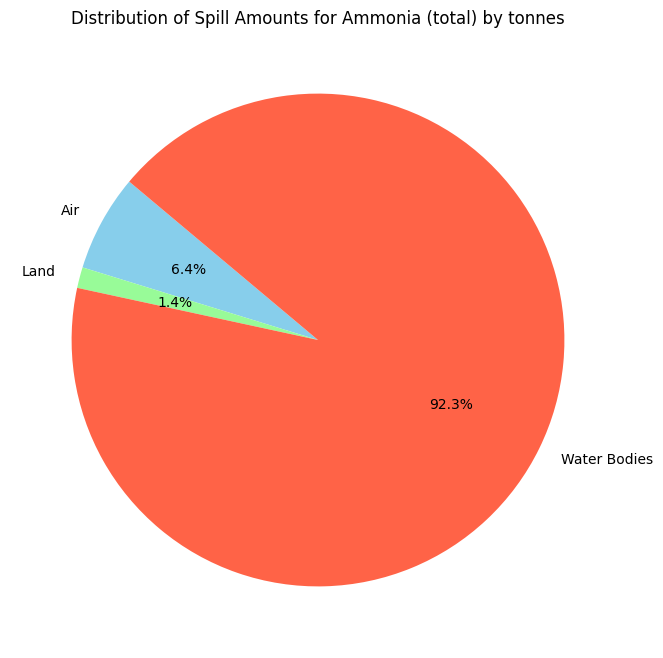

In [ ]:
# @title Distribution of Spill Amounts by realese type



substance_to_analyze = top_substances.index[0]  # Select the top substance

# Aggregate spill data by medium for this substance
substance_data = df[df['substance_name_english_nom_de_substance_anglais'] == substance_to_analyze].agg({
    'release_to_air_spills': 'sum',
    'releases_to_land_spills': 'sum',
    'releases_to_water_bodies_spills': 'sum'
})

# Plot
plt.figure(figsize=(8, 8))
plt.pie(substance_data, labels=['Air', 'Land', 'Water Bodies'], autopct='%1.1f%%', startangle=140, colors=['#87CEEB', '#98FB98', '#FF6347'])
plt.title(f"Distribution of Spill Amounts for {substance_to_analyze} by tonnes")
plt.show()


###Industry-Wise Spill Trend Over Time

<ipython-input-35-242aa9902ec6>:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


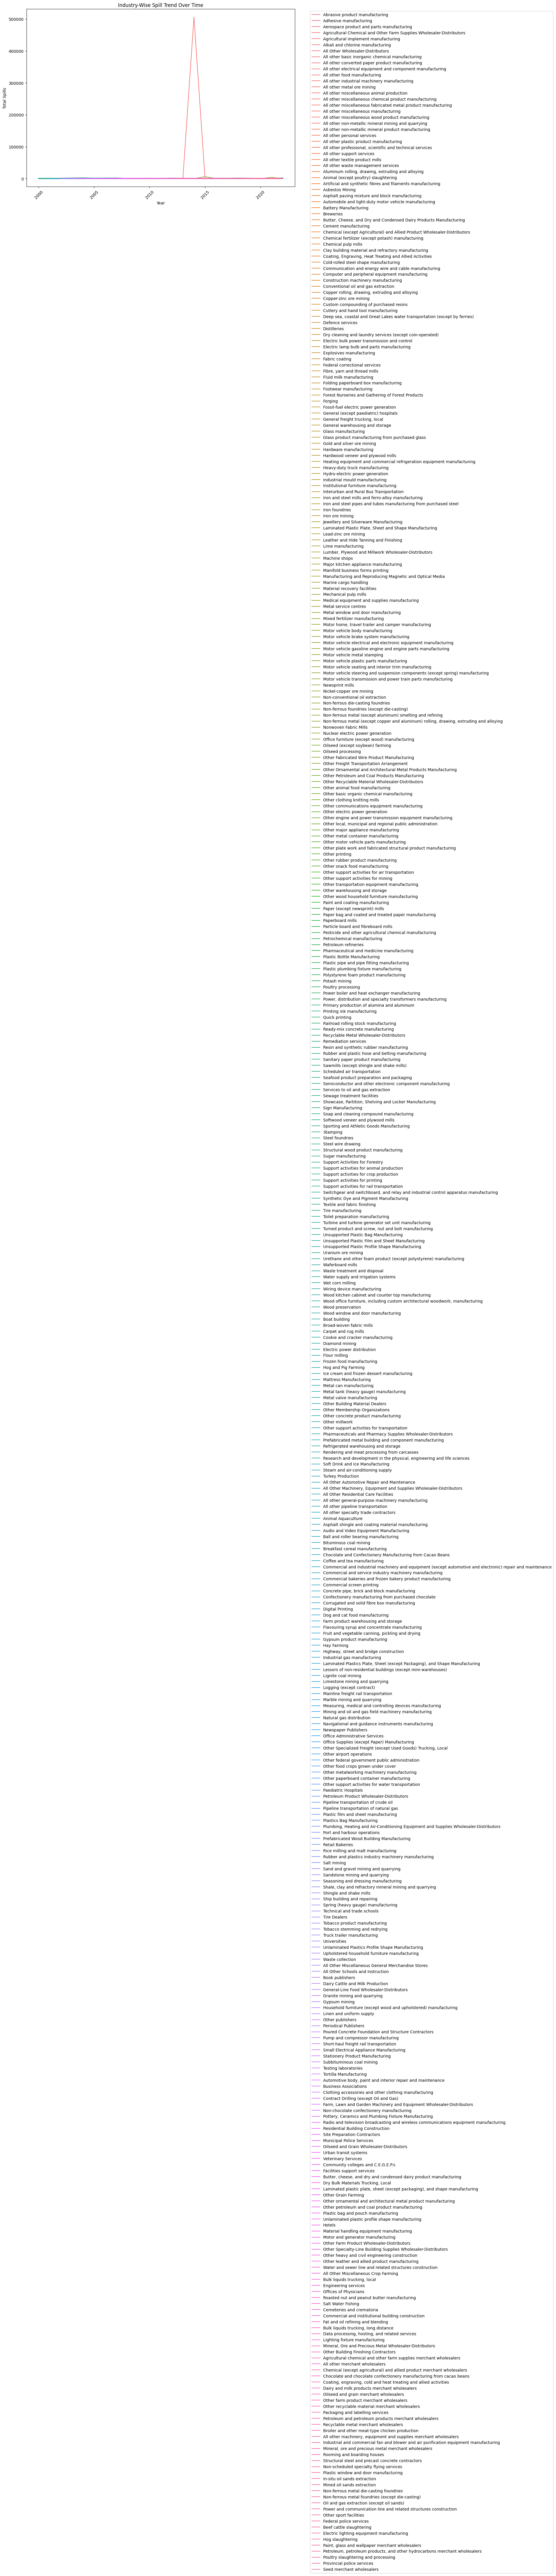

In [ ]:
# Clean up the column names by stripping spaces
df.columns = df.columns.str.strip()

# # Define spill columns
spill_columns = ['release_to_air_spills', 'release_to_air_spills', 'releases_to_water_bodies_spills']

# # 1. Industry-Wise Spill Trend Over Time
df_trend = df.groupby(['reporting_year_année', 'naics_title_titre_code_scian'])[spill_columns].sum().reset_index()
df_trend['Total Spills'] = df_trend[spill_columns].sum(axis=1)

plt.figure(figsize=(12, 8))
sns.lineplot(x='reporting_year_année', y='Total Spills', hue='naics_title_titre_code_scian', data=df_trend)
plt.title('Industry-Wise Spill Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Total Spills')#
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##Spill Type Breakdown by Industry (Stacked Bar Chart)

In [ ]:
# df_spill_type = df.groupby('NAICS Title / Titre Code_SCIAN')[spill_columns].sum().reset_index()

# # Plot a stacked bar chart
# df_spill_type.set_index('NAICS Title / Titre Code_SCIAN')[spill_columns].plot(kind='bar', stacked=True, figsize=(12, 8))
# plt.title('Spill Type Breakdown by Industry')
# plt.xlabel('Industry')
# plt.ylabel('Total Spills')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

Prediction Visualization for 2023 (Optional)

##Company Spill Contribution Pie Chart

In [ ]:
# df_company_spills = df.groupby('Company_Name / Dénomination_sociale_de_l\'entreprise')[spill_columns].sum().reset_index()
# df_company_spills['Total Spills'] = df_company_spills[spill_columns].sum(axis=1)

# # Filter for the top 10 companies contributing to spills
# df_top_companies = df_company_spills.nlargest(10, 'Total Spills')

# # Plot the pie chart
# plt.figure(figsize=(8, 8))
# plt.pie(df_top_companies['Total Spills'], labels=df_top_companies['Company_Name / Dénomination_sociale_de_l\'entreprise'],
#         autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
# plt.title('Top 10 Companies Contributing to Spills')
# plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
# plt.show()

##Spill Types by Year for Major Companies (Bubble Chart)

In [ ]:
# df_bubble = df.groupby(['Company_Name / Dénomination_sociale_de_l\'entreprise', 'Reporting_Year / Année'])[spill_columns].sum().reset_index()
# df_bubble['Total Spills'] = df_bubble[spill_columns].sum(axis=1)

# # Filter for top companies with the most spills overall
# top_companies = df_company_spills.nlargest(5, 'Total Spills')['Company_Name / Dénomination_sociale_de_l\'entreprise']

# # Filter the data for only those top companies
# df_bubble_filtered = df_bubble[df_bubble['Company_Name / Dénomination_sociale_de_l\'entreprise'].isin(top_companies)]

# # Now create the bubble chart
# plt.figure(figsize=(12, 8))
# bubble = plt.scatter(
#     df_bubble_filtered['Reporting_Year / Année'],
#     df_bubble_filtered['Company_Name / Dénomination_sociale_de_l\'entreprise'],
#     s=df_bubble_filtered['Total Spills']*10,  # Scale bubble size
#     alpha=0.5, color='blue')

# plt.title('Spill Types by Year for Major Companies')
# plt.xlabel('Year')
# plt.ylabel('Company')
# plt.tight_layout()
# plt.show()

##a stacked bar chart with a line plot,

In [ ]:
# # Clean up the column names by stripping spaces
# df.columns = df.columns.str.strip()

# # Define spill columns
# spill_columns = ['Release to Air - Spills', 'Releases to Land - Spills', 'Releases to Water Bodies - Spills']

# # Grouping by year and industry, summing up the spills for each year per industry
# df_grouped = df.groupby(['Reporting_Year / Année', 'NAICS Title / Titre Code_SCIAN'])[spill_columns].sum().reset_index()

# # Calculate the total spills for each year (for the trend line)
# df_grouped['Total Spills'] = df_grouped[spill_columns].sum(axis=1)
# df_total_per_year = df_grouped.groupby('Reporting_Year / Année')['Total Spills'].sum().reset_index()

# # Now, let's create the stacked bar chart for the total spills per industry and year
# pivot_data = df_grouped.pivot_table(values=spill_columns,
#                                     index='Reporting_Year / Année',
#                                     columns='NAICS Title / Titre Code_SCIAN',
#                                     aggfunc='sum', fill_value=0)

# # Create a figure and axis
# fig, ax1 = plt.subplots(figsize=(12, 8))

# # Plot the stacked bar chart
# pivot_data.plot(kind='bar', stacked=True, ax=ax1)

# # Create a secondary y-axis for the trend line
# ax2 = ax1.twinx()

# # Plot the trend line on the secondary y-axis
# sns.lineplot(x='Reporting_Year / Année', y='Total Spills', data=df_total_per_year, ax=ax2, color='green', marker='o')

# # Set axis labels and title
# ax1.set_xlabel('Year')
# ax1.set_ylabel('Quantity Spilled')
# ax2.set_ylabel('Total Spills (Trend)')
# plt.title('Spill Releases and Transfers by Industry with Trend Line')

# # Adjust layout and show the plot
# plt.tight_layout()
# plt.show()

# Pattern Discovery


A look at the National Pollutant Release Inventory (NPRI) data from 2012 to 2022 shows some important patterns in industrial spill incidents across Canada. The **oil and gas industry often has the most spills** in terms of both number and amount, especially in places like Alberta and Saskatchewan. This matches the high levels of oil production in these areas. For example, in 2022, oil and gas companies in Alberta cut their methane emissions by 45% compared to 2014, reaching their goal three years early.

The data also shows a **slow rise** in the total number of spills over the years, with some sudden increases. These changes might be due to different reasons, like changes in reporting rules, economic situations, or big industrial events. For instance, in 2016, an oil spill from the ship M/V Marathassa released 3,419 litres, which made up 44% of all the spills recorded that year.

Additionally, certain substances, such as ethylene glycol, are frequently reported in spills, especially in sectors like air transportation where it's used as an antifreeze and de-icer. In 2022, ethylene glycol was the most often released pollutant to land, with increased airport activity and harsher winter conditions likely contributing to this trend.

These insights underscore the critical need for ongoing monitoring, stringent regulatory frameworks, and proactive measures to mitigate environmental impacts resulting from industrial spills.


References Section:
Canada. (2022). Marine pollution spills. Environment and Climate Change Canada. Retrieved from https://www.canada.ca/en/environment-climate-change/services/environmental-indicators/marine-pollution-spills.html

Canadian Energy Centre. (2023). Five ways Canada’s oil and gas industry showed improved environmental performance in 2023. Canadian Energy Centre. Retrieved from https://www.canadianenergycentre.ca/five-ways-canadas-oil-and-gas-industry-showed-improved-environmental-performance-in-2023/

Canada. (2022). National Pollutant Release Inventory: Fact sheet. Environment and Climate Change Canada. Retrieved from https://www.canada.ca/en/environment-climate-change/services/national-pollutant-release-inventory/tools-resources-data/fact-sheet.html


# Handling Null values


- This code creates separate DataFrames for three types of environmental spills: **air**, **land**, and **water**.
  
- It filters the main dataset, `train_data`, to:
  - Include rows where data is available for **air spills** (`df_air`).
  - Include rows with data for **land spills** (`df_land`).
  - Include rows with data for **water spills** (`df_water`).

- For each DataFrame, it drops columns related to the other types of spills:
  - `df_air` keeps only air spill data.
  - `df_land` keeps only land spill data.
  - `df_water` keeps only water spill data.

- Finally, it prints the size (shape) of each DataFrame to confirm everything worked as expected.

In [ ]:
df['substance_name_english_nom_de_substance_anglais'].value_counts()

substance_name_english_nom_de_substance_anglais
PM2.5 - Particulate Matter <= 2.5 Micrometers      88440
PM10 - Particulate Matter <= 10 Micrometers        83139
Nitrogen oxides (expressed as nitrogen dioxide)    73198
Carbon monoxide                                    60232
Volatile Organic Compounds (VOCs)                  58988
                                                   ...  
m-Cresol (and its salts)                               1
o-Cresol (and its salts)                               1
p-Nonylphenol polyethylene glycol ether                1
p-Cresol (and its salts)                               1
Potassium bromate                                      1
Name: count, Length: 261, dtype: int64

In [ ]:
# @title DataFrame for Air Spills, including all other features

df_air = df[df['release_to_air_spills'].notna()].copy()

# DataFrame for Land Spills, including all other features
df_land = df[df['releases_to_land_spills'].notna()].copy()

# DataFrame for Water Bodies Spills, including all other features
df_water = df[df['releases_to_water_bodies_spills'].notna()].copy()

df_air.drop(columns=['releases_to_land_spills', 'releases_to_water_bodies_spills'], inplace=True)
df_land.drop(columns=['release_to_air_spills', 'releases_to_water_bodies_spills'], inplace=True)
df_water.drop(columns=['release_to_air_spills', 'releases_to_land_spills'], inplace=True)

# Display the shape of each DataFrame to verify
print("df_air shape:", df_air.shape)
print("df_land shape:", df_land.shape)
print("df_water shape:", df_water.shape)


df_air shape: (9181, 26)
df_land shape: (4470, 26)
df_water shape: (3080, 26)


In [ ]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9181 entries, 142 to 736013
Data columns (total 26 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   reporting_year_année                              9181 non-null   int64  
 1   npri_id_no_inrp                                   9181 non-null   int64  
 2   number_of_employees                               9179 non-null   object 
 3   company_name_dénomination_sociale_de_lentreprise  9181 non-null   object 
 4   facility_name_installation                        9177 non-null   object 
 5   naics_code_scian                                  9181 non-null   int64  
 6   naics_title_titre_code_scian                      9181 non-null   object 
 7   province                                          9181 non-null   object 
 8   city                                              8800 non-null   object 
 9   latitude            

# Handling outliers

- This code block detects **outliers** in data using the **Interquartile Range (IQR) method** and visualizes them with **box plots** and **scatter plots**.

- The `detect_outliers_iqr` function:
  - Calculates the **first (Q1) and third quartiles (Q3)** for a specified column.
  - Computes the **IQR** (Q3 - Q1) and sets **lower and upper bounds** for outliers (values below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR).
  - Returns the outlier values, along with the bounds.

- The `plot_outliers` function:
  - Creates a **box plot** to highlight the distribution of data and any potential outliers in the column.
  - Generates a **scatter plot** to show data points and uses color to mark outliers.
  - Displays **horizontal lines** to indicate the lower and upper bounds, making it easy to see which points fall outside the typical range.

- These visualizations provide a quick, clear way to **identify and understand outliers** in the data.

In [ ]:
# @title Detecting Outliers

# detect outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

#Function to plot outliers with box plot and scatter plot
def plot_outliers(df, column, lower_bound, upper_bound):
    plt.figure(figsize=(14, 6))

    # Box plot to visualize outliers
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, y=column)
    plt.title(f'Box Plot for {column}')

    # Scatter plot to show outliers in the context of other data points
    plt.subplot(1, 2, 2)
    sns.scatterplot(data=df, x=range(len(df)), y=column, hue=(df[column] > upper_bound) | (df[column] < lower_bound))
    plt.title(f'Scatter Plot with Outliers for {column}')
    plt.axhline(y=lower_bound, color='r', linestyle='--', label='Lower Bound')
    plt.axhline(y=upper_bound, color='r', linestyle='--', label='Upper Bound')
    plt.legend()
    plt.show()


Number of outliers in 'release_to_air_spills': 1748


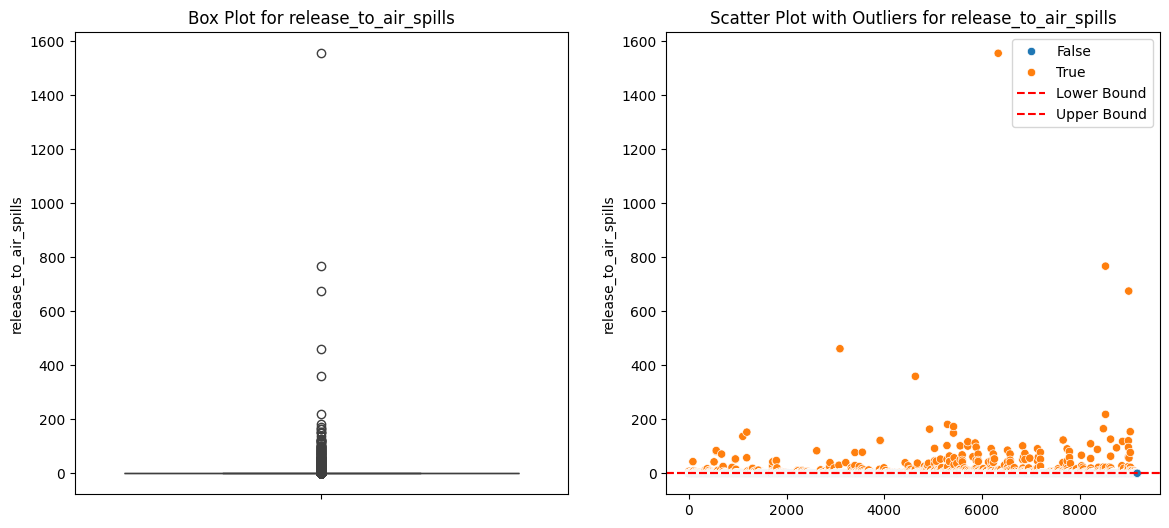

In [ ]:
# @title Detect outliers in the 'release_to_air_spills' column

outliers_air, lower_bound_air, upper_bound_air = detect_outliers_iqr(df_air, 'release_to_air_spills')

# Visualize the outliers
print(f"Number of outliers in 'release_to_air_spills': {len(outliers_air)}")
plot_outliers(df_air, 'release_to_air_spills', lower_bound_air, upper_bound_air)


Number of outliers in 'releases_to_land_spills': 851


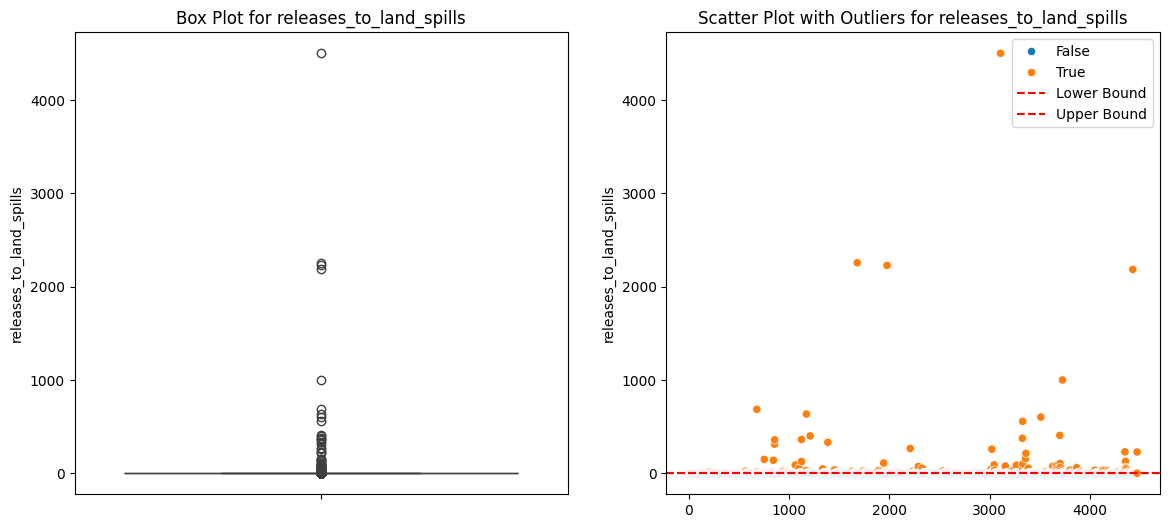

In [ ]:
# @title Detect outliers in the 'releases_to_land_spills' column
# Detect outliers in the 'releases_to_land_spills' column
outliers_land, lower_bound_land, upper_bound_land = detect_outliers_iqr(df_land, 'releases_to_land_spills')

# Visualize the outliers
print(f"Number of outliers in 'releases_to_land_spills': {len(outliers_land)}")
plot_outliers(df_land, 'releases_to_land_spills', lower_bound_land, upper_bound_land)


Number of outliers in 'releases_to_water_bodies_spills': 531


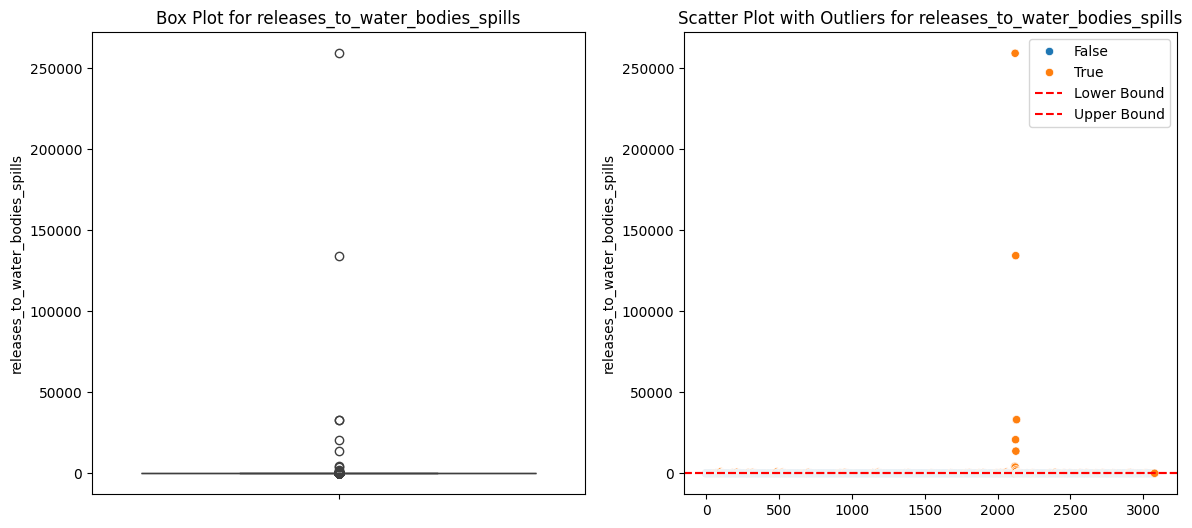

In [ ]:
# @title Detect outliers in the 'releases_to_water_bodies_spills' column
# Detect outliers in the 'releases_to_water_bodies_spills' column
outliers_water, lower_bound_water, upper_bound_water = detect_outliers_iqr(df_water, 'releases_to_water_bodies_spills')

# Visualize the outliers
print(f"Number of outliers in 'releases_to_water_bodies_spills': {len(outliers_water)}")
plot_outliers(df_water, 'releases_to_water_bodies_spills', lower_bound_water, upper_bound_water)


In [ ]:
# @title Remove outliers
# Remove outliers in 'release_to_air_spills'
df_air = df_air[(df_air['release_to_air_spills'] >= lower_bound_air) & (df_air['release_to_air_spills'] <= upper_bound_air)]

# Remove outliers in 'releases_to_land_spills'
df_land = df_land[(df_land['releases_to_land_spills'] >= lower_bound_land) & (df_land['releases_to_land_spills'] <= upper_bound_land)]

# Remove outliers in 'releases_to_water_bodies_spills'
df_water = df_water[(df_water['releases_to_water_bodies_spills'] >= lower_bound_water) & (df_water['releases_to_water_bodies_spills'] <= upper_bound_water)]


### Checking Dataframes after removig outliers

In [ ]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7433 entries, 142 to 736013
Data columns (total 26 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   reporting_year_année                              7433 non-null   int64  
 1   npri_id_no_inrp                                   7433 non-null   int64  
 2   number_of_employees                               7433 non-null   object 
 3   company_name_dénomination_sociale_de_lentreprise  7433 non-null   object 
 4   facility_name_installation                        7429 non-null   object 
 5   naics_code_scian                                  7433 non-null   int64  
 6   naics_title_titre_code_scian                      7433 non-null   object 
 7   province                                          7433 non-null   object 
 8   city                                              7121 non-null   object 
 9   latitude            

In [ ]:
df_land.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3619 entries, 166 to 731607
Data columns (total 26 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   reporting_year_année                              3619 non-null   int64  
 1   npri_id_no_inrp                                   3619 non-null   int64  
 2   number_of_employees                               3618 non-null   object 
 3   company_name_dénomination_sociale_de_lentreprise  3619 non-null   object 
 4   facility_name_installation                        3617 non-null   object 
 5   naics_code_scian                                  3619 non-null   int64  
 6   naics_title_titre_code_scian                      3619 non-null   object 
 7   province                                          3619 non-null   object 
 8   city                                              3510 non-null   object 
 9   latitude            

In [ ]:
df_water.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2549 entries, 1057 to 711947
Data columns (total 26 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   reporting_year_année                              2549 non-null   int64  
 1   npri_id_no_inrp                                   2549 non-null   int64  
 2   number_of_employees                               2549 non-null   object 
 3   company_name_dénomination_sociale_de_lentreprise  2549 non-null   object 
 4   facility_name_installation                        2549 non-null   object 
 5   naics_code_scian                                  2549 non-null   int64  
 6   naics_title_titre_code_scian                      2549 non-null   object 
 7   province                                          2549 non-null   object 
 8   city                                              2494 non-null   object 
 9   latitude           